In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import copy
import plotly.express as px
import plotly.io as pio

#Pre-Processing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold

#models
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
!pip install xgboost
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Kernels
from sklearn.gaussian_process.kernels import RBF, WhiteKernel,Matern,ExpSineSquared,RationalQuadratic, ConstantKernel as C

#Scipy
from scipy.spatial import distance
import scipy
import scipy.optimize as opt
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping
from scipy.optimize import minimize
from scipy.stats import norm

#Pytorch
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim

#For plots
!pip install kaleido
!sudo apt-get install poppler-utils

#Optuna
!pip install optuna
import optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (127 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so th

**Importing Data**

In [ ]:
!git clone https://github.com/ihdavjar/Data_For_Biomarker_Analysis.git

Cloning into 'Data_For_Biomarker_Analysis'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 115 (delta 5), reused 0 (delta 0), pack-reused 86
Receiving objects: 100% (115/115), 9.48 MiB | 10.96 MiB/s, done.
Resolving deltas: 100% (31/31), done.


**Data Preparation for Lefse**

In [ ]:
data_1=pd.read_csv("/content/Data_For_Biomarker_Analysis/Main_Data/Otu_Counts.tsv")
data_1

otu_id  SRR3991444  SRR3991609  SRR3991531  \
0     f9e6e13db5e9e17c5ec67373a3304d57           6           0           1   
1     e9a7d81ea11a1e900e5852db9d690582           4           3           0   
2     869e4cf876405023c3e4436d89547ddf           3           1           0   
3     fac6f5c44c33a2c00a40c646fb20ce80           3           0           0   
4     13200de5d753dd6a61efd16894024af9           3           0           4   
...                                ...         ...         ...         ...   
3602  21efca24acf781e1c8c0c4e3678d5789           0           0           0   
3603  845f5b3ab0040ffce5938be8813bc387           0           0           0   
3604  c365e1021f22e77fb392a08f87ec6c8e           0           0           0   
3605  010a52f996ebf376427e339e12ebabe6           0           0           0   
3606  05c759f327c0a7eaf22e94dea10313b1           0           0           0   

      SRR3991495  SRR3991554  SRR3991568  SRR3991477  SRR3991372  SRR3991625  \
0             13           0          11           6           8           5   
1             19           0          13           6          14          16   
2              3           0           0          13          28           0   
3              0           0           0           0           0           0   
4              0          16          13          12           0          11   
...          ...         ...         ...         ...         ...         ...   
3602           0           0           0           0           0           0   
3603           0           0           0           0           0           0   
3604           0           0           0           0           0           0   
3605           0           0           0           0           0           0   
3606           0           0           0           0           0           0   

      ...  SRR3991455  SRR3991385  SRR3991623  SRR3991494  SRR3991502  \
0     ...           2           3           3          15           0   
1     ...           2           6           2          18           0   
2     ...           0           1           8           1           3   
3     ...           0           0           0           0           0   
4     ...           5           6           4           9          15   
...   ...         ...         ...         ...         ...         ...   
3602  ...           0           0           0           0           0   
3603  ...           0           0           0           0           0   
3604  ...           0           0           0           0           0   
3605  ...           0           0           0           0           0   
3606  ...           0           0           0           0           0   

      SRR3991543  SRR3991594  SRR3991499  SRR3991582  \
0              0           3           3           0   
1              0           2           4           0   
2             23           0           0           6   
3              0           0           0           0   
4             50           0           0           5   
...          ...         ...         ...         ...   
3602          25           0           0           0   
3603          24           0           0           0   
3604          24           0           0           0   
3605          23           0           0           0   
3606          19           0           0           0   

                                               taxonomy  
0     d__Bacteria; p__Proteobacteria; c__Gammaproteo...  
1     d__Bacteria; p__Proteobacteria; c__Gammaproteo...  
2     d__Bacteria; p__Proteobacteria; c__Alphaproteo...  
3     d__Bacteria; p__Proteobacteria; c__Gammaproteo...  
4     d__Bacteria; p__Proteobacteria; c__Gammaproteo...  
...                                                 ...  
3602                                        d__Bacteria  
3603                                        d__Bacteria  
3604                                        d__Bacteria  
3605

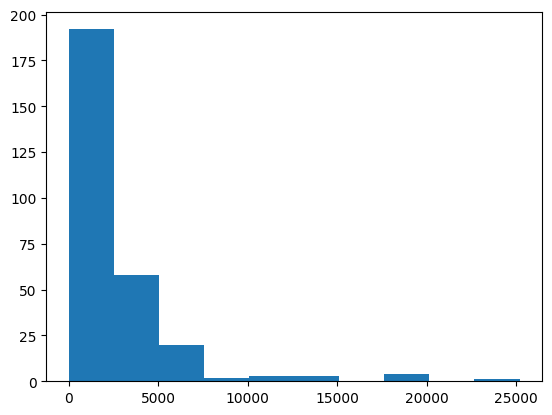

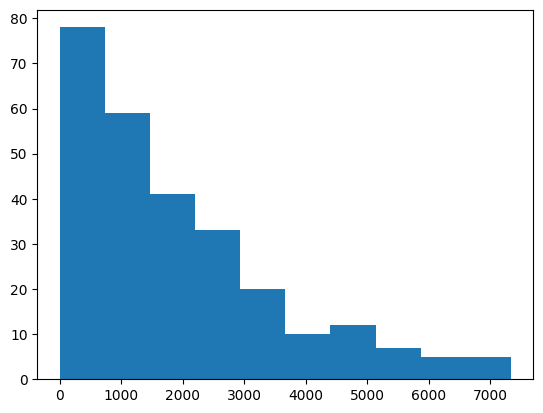

In [ ]:
temp_l_cols=list(data_1.columns)
num_taxa_non_unique=[]
for i in range(1,len(temp_l_cols)-1):
  num_taxa_non_unique.append(sum(list(data_1[temp_l_cols[i]])))

plt.hist(num_taxa_non_unique)
plt.show()

num_taxa_non_unique=np.array(num_taxa_non_unique)
plt.hist(num_taxa_non_unique[num_taxa_non_unique<8000])
plt.show()

In [ ]:
org_data=pd.read_csv("/content/Data_For_Biomarker_Analysis/Main_Data/Otu_Counts.tsv")

taxonomy_arr=list(org_data["taxonomy"])
otu_ids=list(org_data["otu_id"])
print(taxonomy_arr)
print(otu_ids)

#Removing the taxonomy and the otu_ids from the feature table
org_data=org_data.drop(["otu_id","taxonomy"],axis=1)


temp_data=np.array(org_data)
temp_otus=[]
for i in range(len(temp_data)):
  temp_otus.append("Otu"+str(i+1))


#Adding the labels to feature table
org_data=org_data.T
org_data.columns=temp_otus
org_data['total_counts']=num_taxa_non_unique

print(org_data)

temp_data=pd.read_csv("/content/Data_For_Biomarker_Analysis/Main_Data/label_data.csv")
temp_data=temp_data.drop(['Unnamed: 0'],axis=1)
temp_data_np=np.array(temp_data)

print(temp_data)

dict_temp={}
for i in range(len(temp_data_np)):
  if (temp_data_np[i,1]=="Squamous cell carcinoma"):
    dict_temp[temp_data_np[i,0]]="Squamous"
  else:
    dict_temp[temp_data_np[i,0]]=temp_data_np[i,1]

l_temp_row=list(org_data.index)
temp_labels=[]

for i in range(len(l_temp_row)):
  if (dict_temp[l_temp_row[i]]=="Adenosquamous carcinoma"):
    org_data.drop([l_temp_row[i]],axis=0,inplace=True)
  else:
    temp_labels.append(dict_temp[l_temp_row[i]])


org_data_np=np.array(org_data)
org_data

print(len(num_taxa_non_unique))
org_data['label']=temp_labels


# org_data=org_data[org_data["total_counts"]<7500]

org_data.drop(["total_counts"],axis=1,inplace=True)
org_data.to_csv('complete_otus.csv',index=False)
# files.download('complete_otus.csv')

org_data


['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

Otu1  Otu2  Otu3  Otu4  Otu5  Otu6  Otu7  Otu8  Otu9  Otu10  ...  \
SRR3991444     6     4     3     3     3     3     3     2     2      2  ...   
SRR3991609     0     3     1     0     0     0     3     0     5      7  ...   
SRR3991531     1     0     0     0     4     0     0     0     3      0  ...   
SRR3991495    13    19     3     0     0     0     0     0    16      0  ...   
SRR3991554     0     0     0     0    16     0     0     0     0      0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
SRR3991502     0     0     3     0    15     0     0     0     0      0  ...   
SRR3991543     0     0    23     0    50     0     0     0     0      0  ...   
SRR3991594     3     2     0     0     0     1     0     0     1      0  ...   
SRR3991499     3     4     0     0     0     0     0     0     9      0  ...   
SRR3991582     0     0     6     0     5     0     0     0     0      0  ...   

            Otu3599  Otu3600  Otu3601  Otu3602  Otu3603  Otu3604  Otu3605  \
SRR3991444        0        0        0        0        0        0        0   
SRR3991609        0        0        0        0        0        0        0   
SRR3991531        0        0        0        0        0        0        0   
SRR3991495        0        0        0        0        0        0        0   
SRR3991554        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
SRR3991502        0        0        0        0        0        0        0   
SRR3991543        0        0       36       27       25       24       24   
SRR3991594        0        0        0        0        0        0        0   
SRR3991499        0        0        0        0        0        0        0   
SRR3991582        0        0        0        0        0        0        0   

            Otu3606  Otu3607           label  
SRR3991444        0        0        Squamous  
SRR3991609        0        0  Adenocarcinoma  
SRR3991531        0        0        Squamous  
SRR3991495        0        0  Adenocarcinoma  
SRR3991554        0        0        Squamous  
...             ...      ...             ...  
SRR3991502        0        0  Adenocarcinoma  
SRR3991543       23       19        Squamous  
SRR3991594        0        0        Squamous  
SRR3991499        0        0  Adenocarcinoma  
SRR3991582        0        0  Adenocarcinoma  

[279 rows x 3608 columns]

In [ ]:
le = preprocessing.LabelEncoder()

org_data_np=np.array(org_data)

labels=le.fit_transform(org_data_np[:,len(org_data_np[0])-1])

org_data_np[:,len(org_data_np[0])-1]=labels

stan_data=pd.DataFrame(org_data_np,columns=org_data.columns,index=org_data.index)
stan_data

Otu1 Otu2 Otu3 Otu4 Otu5 Otu6 Otu7 Otu8 Otu9 Otu10  ... Otu3599  \
SRR3991444    6    4    3    3    3    3    3    2    2     2  ...       0   
SRR3991609    0    3    1    0    0    0    3    0    5     7  ...       0   
SRR3991531    1    0    0    0    4    0    0    0    3     0  ...       0   
SRR3991495   13   19    3    0    0    0    0    0   16     0  ...       0   
SRR3991554    0    0    0    0   16    0    0    0    0     0  ...       0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...   
SRR3991502    0    0    3    0   15    0    0    0    0     0  ...       0   
SRR3991543    0    0   23    0   50    0    0    0    0     0  ...       0   
SRR3991594    3    2    0    0    0    1    0    0    1     0  ...       0   
SRR3991499    3    4    0    0    0    0    0    0    9     0  ...       0   
SRR3991582    0    0    6    0    5    0    0    0    0     0  ...       0   

           Otu3600 Otu3601 Otu3602 Otu3603 Otu3604 Otu3605 Otu3606 Otu3607  \
SRR3991444       0       0       0       0       0       0       0       0   
SRR3991609       0       0       0       0       0       0       0       0   
SRR3991531       0       0       0       0       0       0       0       0   
SRR3991495       0       0       0       0       0       0       0       0   
SRR3991554       0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
SRR3991502       0       0       0       0       0       0       0       0   
SRR3991543       0      36      27      25      24      24      23      19   
SRR3991594       0       0       0       0       0       0       0       0   
SRR3991499       0       0       0       0       0       0       0       0   
SRR3991582       0       0       0       0       0       0       0       0   

           label  
SRR3991444     1  
SRR3991609     0  
SRR3991531     1  
SRR3991495     0  
SRR3991554     1  
...          ...  
SRR3991502     0  
SRR3991543     1  
SRR3991594     1  
SRR3991499     0  
SRR3991582     0  

[279 rows x 3608 columns]

In [ ]:
l_cols=taxonomy_arr
print(l_cols)
print(len(l_cols))
for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  print(temp)

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

**Data With columns as Phylum, Class, Order, Family, Genus**

**Phylum Wise Analysis**

In [ ]:
phyllum_labels=[]
count_no_phyllum=0

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)!=1):
    if (temp[1] not in phyllum_labels):
      phyllum_labels.append(temp[1])

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==1):
    count_no_phyllum=count_no_phyllum+1

print("Number of Taxa without the phyllum labels:-",count_no_phyllum)

print("No. of distinct phyllum are:-",len(phyllum_labels))
print(phyllum_labels)

Number of Taxa without the phyllum labels:- 407
No. of distinct phyllum are:- 20
[' p__Proteobacteria', ' p__Firmicutes', ' p__Actinobacteriota', ' p__Bacteroidota', ' p__Deinococcota', ' p__Patescibacteria', ' p__Bdellovibrionota', ' p__Cyanobacteria', ' p__Fusobacteriota', ' p__Campilobacterota', ' p__Verrucomicrobiota', ' p__Elusimicrobiota', ' p__Desulfobacterota', ' p__Myxococcota', ' p__Acidobacteriota', ' p__Chloroflexi', ' p__Methylomirabilota', ' p__Spirochaetota', ' p__Planctomycetota', ' p__Dependentiae']


In [ ]:
numpy_data=np.array(stan_data)
print(l_cols)
stan_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

Otu1 Otu2 Otu3 Otu4 Otu5 Otu6 Otu7 Otu8 Otu9 Otu10  ... Otu3599  \
SRR3991444    6    4    3    3    3    3    3    2    2     2  ...       0   
SRR3991609    0    3    1    0    0    0    3    0    5     7  ...       0   
SRR3991531    1    0    0    0    4    0    0    0    3     0  ...       0   
SRR3991495   13   19    3    0    0    0    0    0   16     0  ...       0   
SRR3991554    0    0    0    0   16    0    0    0    0     0  ...       0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...   
SRR3991502    0    0    3    0   15    0    0    0    0     0  ...       0   
SRR3991543    0    0   23    0   50    0    0    0    0     0  ...       0   
SRR3991594    3    2    0    0    0    1    0    0    1     0  ...       0   
SRR3991499    3    4    0    0    0    0    0    0    9     0  ...       0   
SRR3991582    0    0    6    0    5    0    0    0    0     0  ...       0   

           Otu3600 Otu3601 Otu3602 Otu3603 Otu3604 Otu3605 Otu3606 Otu3607  \
SRR3991444       0       0       0       0       0       0       0       0   
SRR3991609       0       0       0       0       0       0       0       0   
SRR3991531       0       0       0       0       0       0       0       0   
SRR3991495       0       0       0       0       0       0       0       0   
SRR3991554       0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
SRR3991502       0       0       0       0       0       0       0       0   
SRR3991543       0      36      27      25      24      24      23      19   
SRR3991594       0       0       0       0       0       0       0       0   
SRR3991499       0       0       0       0       0       0       0       0   
SRR3991582       0       0       0       0       0       0       0       0   

           label  
SRR3991444     1  
SRR3991609     0  
SRR3991531     1  
SRR3991495     0  
SRR3991554     1  
...          ...  
SRR3991502     0  
SRR3991543     1  
SRR3991594     1  
SRR3991499     0  
SRR3991582     0  

[279 rows x 3608 columns]

In [ ]:
temp_dict={}
for i in range(len(phyllum_labels)):
  temp_dict[phyllum_labels[i]]=0

temp_dict

{' p__Proteobacteria': 0,
 ' p__Firmicutes': 0,
 ' p__Actinobacteriota': 0,
 ' p__Bacteroidota': 0,
 ' p__Deinococcota': 0,
 ' p__Patescibacteria': 0,
 ' p__Bdellovibrionota': 0,
 ' p__Cyanobacteria': 0,
 ' p__Fusobacteriota': 0,
 ' p__Campilobacterota': 0,
 ' p__Verrucomicrobiota': 0,
 ' p__Elusimicrobiota': 0,
 ' p__Desulfobacterota': 0,
 ' p__Myxococcota': 0,
 ' p__Acidobacteriota': 0,
 ' p__Chloroflexi': 0,
 ' p__Methylomirabilota': 0,
 ' p__Spirochaetota': 0,
 ' p__Planctomycetota': 0,
 ' p__Dependentiae': 0}

In [ ]:
temps_arr=[]

for i in range(len(numpy_data)):
  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>1):
      new_dict[temp[1]]=new_dict[temp[1]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)

temp_columns=list(temp_dict.keys())

phylum_data=pd.DataFrame(temps_arr,columns=np.array(temp_columns),index=np.array(stan_data.index))
# phylum_data['treatment']=list(stan_data["treatment"])
print(temps_arr)

[[  38    9    2 ...    0    0    0]
 [ 160   62   54 ...    0    0    0]
 [ 504  105   63 ...    0    0    0]
 ...
 [ 161 1481    0 ...    0    0    0]
 [ 483  144   55 ...    0    0    0]
 [ 405   46    0 ...    0    0    0]]


In [ ]:
phylum_data.to_csv("phylum_data.csv")
phylum_data

p__Proteobacteria   p__Firmicutes   p__Actinobacteriota  \
SRR3991444                  38               9                     2   
SRR3991609                 160              62                    54   
SRR3991531                 504             105                    63   
SRR3991495                 571             170                     5   
SRR3991554                 595             172                     6   
...                        ...             ...                   ...   
SRR3991502                 436             192                   147   
SRR3991543                1159               0                     0   
SRR3991594                 161            1481                     0   
SRR3991499                 483             144                    55   
SRR3991582                 405              46                     0   

             p__Bacteroidota   p__Deinococcota   p__Patescibacteria  \
SRR3991444                 0                 0                    0   
SRR3991609                51                 0                    0   
SRR3991531               204              1154                   28   
SRR3991495               239              1121                   26   
SRR3991554                83                 0                    0   
...                      ...               ...                  ...   
SRR3991502                32              1628                    7   
SRR3991543               162                 0                    0   
SRR3991594                19                 0                    0   
SRR3991499                32              1003                   17   
SRR3991582                56                 0                    0   

             p__Bdellovibrionota   p__Cyanobacteria   p__Fusobacteriota  \
SRR3991444                     0                  0                   0   
SRR3991609                     0                  0                   0   
SRR3991531                    37                 27                  20   
SRR3991495                    15                  0                  47   
SRR3991554                     0                  0                   0   
...                          ...                ...                 ...   
SRR3991502                    20                  6                   0   
SRR3991543                     0                  0                   0   
SRR3991594                     0                  0                   0   
SRR3991499                     0                  0                   4   
SRR3991582                     0                 22                   0   

             p__Campilobacterota   p__Verrucomicrobiota   p__Elusimicrobiota  \
SRR3991444                     0                      0                    0   
SRR3991609                     0                      0                    0   
SRR3991531                     0                      0                    0   
SRR3991495                     0                      0                    0   
SRR3991554                     0                      0                    0   
...                          ...                    ...                  ...   
SRR3991502                     0                      0                    0   
SRR3991543                     0                      0                    0   
SRR3991594                     0                      0                    0   
SRR3991499                     0                      0                    0   
SRR3991582                     0                      0                    0   

             p__Desulfobacterota   p__Myxococcota   p__Acidobacteriota  \
SRR3991444                     0                0                    0   
SRR3991609                     0                0                    0   
SRR3991531                     0                0                    0   
SRR3991495                     0                0                    0   
SRR3991554                     0                0              

**Class Wise Analysis**

In [ ]:
class_labels=[]
count_no_class=0

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>2):
    if (temp[2] not in class_labels):
      class_labels.append(temp[2])

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==2):
    count_no_class=count_no_class+1

print("Number of Taxa without the class labels:-",count_no_class)

print("No. of distinct class are:-",len(class_labels))
print(class_labels)

Number of Taxa without the class labels:- 116
No. of distinct class are:- 41
[' c__Gammaproteobacteria', ' c__Alphaproteobacteria', ' c__Negativicutes', ' c__Actinobacteria', ' c__Bacilli', ' c__Bacteroidia', ' c__Deinococci', ' c__Gracilibacteria', ' c__Bdellovibrionia', ' c__Vampirivibrionia', ' c__Fusobacteriia', ' c__Oligoflexia', ' c__Clostridia', ' c__Campylobacteria', ' c__Chlamydiae', ' c__Saccharimonadia', ' c__Parcubacteria', ' c__Thermoanaerobacteria', ' c__Verrucomicrobiae', ' c__Elusimicrobia', ' c__Desulfovibrionia', ' c__Polyangia', ' c__Lentisphaeria', ' c__ABY1', ' c__Acidobacteriae', ' c__Coriobacteriia', ' c__Omnitrophia', ' c__Myxococcia', ' c__Acidimicrobiia', ' c__Cyanobacteriia', ' c__Thermoleophilia', ' c__Anaerolineae', ' c__Chloroflexia', ' c__Methylomirabilia', ' c__Spirochaetia', ' c__Planctomycetes', ' c__Vicinamibacteria', ' c__Babeliae', ' c__Blastocatellia', ' c__OLB14', ' c__Berkelbacteria']


In [ ]:
temp_dict={}
for i in range(len(class_labels)):
  temp_dict[class_labels[i]]=0

temp_dict

{' c__Gammaproteobacteria': 0,
 ' c__Alphaproteobacteria': 0,
 ' c__Negativicutes': 0,
 ' c__Actinobacteria': 0,
 ' c__Bacilli': 0,
 ' c__Bacteroidia': 0,
 ' c__Deinococci': 0,
 ' c__Gracilibacteria': 0,
 ' c__Bdellovibrionia': 0,
 ' c__Vampirivibrionia': 0,
 ' c__Fusobacteriia': 0,
 ' c__Oligoflexia': 0,
 ' c__Clostridia': 0,
 ' c__Campylobacteria': 0,
 ' c__Chlamydiae': 0,
 ' c__Saccharimonadia': 0,
 ' c__Parcubacteria': 0,
 ' c__Thermoanaerobacteria': 0,
 ' c__Verrucomicrobiae': 0,
 ' c__Elusimicrobia': 0,
 ' c__Desulfovibrionia': 0,
 ' c__Polyangia': 0,
 ' c__Lentisphaeria': 0,
 ' c__ABY1': 0,
 ' c__Acidobacteriae': 0,
 ' c__Coriobacteriia': 0,
 ' c__Omnitrophia': 0,
 ' c__Myxococcia': 0,
 ' c__Acidimicrobiia': 0,
 ' c__Cyanobacteriia': 0,
 ' c__Thermoleophilia': 0,
 ' c__Anaerolineae': 0,
 ' c__Chloroflexia': 0,
 ' c__Methylomirabilia': 0,
 ' c__Spirochaetia': 0,
 ' c__Planctomycetes': 0,
 ' c__Vicinamibacteria': 0,
 ' c__Babeliae': 0,
 ' c__Blastocatellia': 0,
 ' c__OLB14': 0,
 '

In [ ]:
numpy_data=np.array(stan_data)
print(l_cols)
stan_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

Otu1 Otu2 Otu3 Otu4 Otu5 Otu6 Otu7 Otu8 Otu9 Otu10  ... Otu3599  \
SRR3991444    6    4    3    3    3    3    3    2    2     2  ...       0   
SRR3991609    0    3    1    0    0    0    3    0    5     7  ...       0   
SRR3991531    1    0    0    0    4    0    0    0    3     0  ...       0   
SRR3991495   13   19    3    0    0    0    0    0   16     0  ...       0   
SRR3991554    0    0    0    0   16    0    0    0    0     0  ...       0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...   
SRR3991502    0    0    3    0   15    0    0    0    0     0  ...       0   
SRR3991543    0    0   23    0   50    0    0    0    0     0  ...       0   
SRR3991594    3    2    0    0    0    1    0    0    1     0  ...       0   
SRR3991499    3    4    0    0    0    0    0    0    9     0  ...       0   
SRR3991582    0    0    6    0    5    0    0    0    0     0  ...       0   

           Otu3600 Otu3601 Otu3602 Otu3603 Otu3604 Otu3605 Otu3606 Otu3607  \
SRR3991444       0       0       0       0       0       0       0       0   
SRR3991609       0       0       0       0       0       0       0       0   
SRR3991531       0       0       0       0       0       0       0       0   
SRR3991495       0       0       0       0       0       0       0       0   
SRR3991554       0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
SRR3991502       0       0       0       0       0       0       0       0   
SRR3991543       0      36      27      25      24      24      23      19   
SRR3991594       0       0       0       0       0       0       0       0   
SRR3991499       0       0       0       0       0       0       0       0   
SRR3991582       0       0       0       0       0       0       0       0   

           label  
SRR3991444     1  
SRR3991609     0  
SRR3991531     1  
SRR3991495     0  
SRR3991554     1  
...          ...  
SRR3991502     0  
SRR3991543     1  
SRR3991594     1  
SRR3991499     0  
SRR3991582     0  

[279 rows x 3608 columns]

In [ ]:
temps_arr=[]

for i in range(len(numpy_data)):
  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>2):
      new_dict[temp[2]]=new_dict[temp[2]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)

temp_columns=list(temp_dict.keys())

class_data=pd.DataFrame(temps_arr,columns=np.array(temp_columns),index=np.array(stan_data.index))
# phylum_data['treatment']=list(stan_data["treatment"])
print(temps_arr)

[[ 29   9   9 ...   0   0   0]
 [123  37  36 ...   0   0   0]
 [346 158   0 ...   0   0   0]
 ...
 [161   0   0 ...   0   0   0]
 [376  59   0 ...   0   0   0]
 [216 189   0 ...   0   0   0]]


In [ ]:
class_data.to_csv("class_data.csv")
class_data

c__Gammaproteobacteria   c__Alphaproteobacteria  \
SRR3991444                       29                        9   
SRR3991609                      123                       37   
SRR3991531                      346                      158   
SRR3991495                      527                       44   
SRR3991554                      462                      133   
...                             ...                      ...   
SRR3991502                      333                      103   
SRR3991543                      933                      226   
SRR3991594                      161                        0   
SRR3991499                      376                       59   
SRR3991582                      216                      189   

             c__Negativicutes   c__Actinobacteria   c__Bacilli  \
SRR3991444                  9                   2            0   
SRR3991609                 36                  54           26   
SRR3991531                  0                  63          105   
SRR3991495                  0                   0          170   
SRR3991554                  0                   6          170   
...                       ...                 ...          ...   
SRR3991502                  0                 147          125   
SRR3991543                  0                   0            0   
SRR3991594                  0                   0         1449   
SRR3991499                  0                  55          144   
SRR3991582                  0                   0           46   

             c__Bacteroidia   c__Deinococci   c__Gracilibacteria  \
SRR3991444                0               0                    0   
SRR3991609               51               0                    0   
SRR3991531              204            1154                   19   
SRR3991495              239            1121                   22   
SRR3991554               83               0                    0   
...                     ...             ...                  ...   
SRR3991502               32            1628                    7   
SRR3991543              162               0                    0   
SRR3991594               19               0                    0   
SRR3991499               32            1003                    9   
SRR3991582               56               0                    0   

             c__Bdellovibrionia   c__Vampirivibrionia  ...   c__Anaerolineae  \
SRR3991444                    0                     0  ...                 0   
SRR3991609                    0                     0  ...                 0   
SRR3991531                   37                    27  ...                 0   
SRR3991495                    0                     0  ...                 0   
SRR3991554                    0                     0  ...                 0   
...                         ...                   ...  ...               ...   
SRR3991502                    0                     6  ...                 0   
SRR3991543                    0                     0  ...                 0   
SRR3991594                    0                     0  ...                 0   
SRR3991499                    0                     0  ...                 0   
SRR3991582                    0                    22  ...                 0   

             c__Chloroflexia   c__Methylomirabilia   c__Spirochaetia  \
SRR3991444                 0                     0                 0   
SRR3991609                 0                     0                 0   
SRR3991531                 0                     0                 0   
SRR3991495                 0                     0                 0   
SRR3991554                 0                     0                 0   
...                      ...                   ...               ...   
SRR3991502                 0                     0                 0   
SRR3991543                 0                     0                 0   
SRR3991594               

**Order Wise Analysis**

In [ ]:
order_labels=[]
count_no_order=0

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>3):
    if (temp[3] not in order_labels):
      order_labels.append(temp[3])

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==3):
    count_no_order=count_no_order+1

print("Number of Taxa without the order labels:-",count_no_order)

print("No. of distinct order are:-",len(order_labels))
print(order_labels)

Number of Taxa without the order labels:- 783
No. of distinct order are:- 81
[' o__Burkholderiales', ' o__Rhizobiales', ' o__Veillonellales-Selenomonadales', ' o__Pseudomonadales', ' o__Lactobacillales', ' o__Sphingobacteriales', ' o__Flavobacteriales', ' o__Thermales', ' o__Cytophagales', ' o__Bacillales', ' o__Sphingomonadales', ' o__Bdellovibrionales', ' o__Obscuribacterales', ' o__Enterobacterales', ' o__Caulobacterales', ' o__Fusobacteriales', ' o__Propionibacteriales', ' o__Bacteroidales', ' o__Oligoflexales', ' o__Exiguobacterales', ' o__Micrococcales', ' o__Peptostreptococcales-Tissierellales', ' o__Staphylococcales', ' o__Lachnospirales', ' o__Pasteurellales', ' o__Campylobacterales', ' o__Rhodobacterales', ' o__Chlamydiales', ' o__Saccharimonadales', ' o__Candidatus_Kaiserbacteria', ' o__Thermoanaerobacterales', ' o__Frankiales', ' o__Xanthomonadales', ' o__Oscillospirales', ' o__Clostridiales', ' o__Verrucomicrobiales', ' o__Erysipelotrichales', ' o__Lineage_IV', ' o__Desulf

In [ ]:
temp_dict={}
for i in range(len(order_labels)):
  temp_dict[order_labels[i]]=0

temp_dict

{' o__Burkholderiales': 0,
 ' o__Rhizobiales': 0,
 ' o__Veillonellales-Selenomonadales': 0,
 ' o__Pseudomonadales': 0,
 ' o__Lactobacillales': 0,
 ' o__Sphingobacteriales': 0,
 ' o__Flavobacteriales': 0,
 ' o__Thermales': 0,
 ' o__Cytophagales': 0,
 ' o__Bacillales': 0,
 ' o__Sphingomonadales': 0,
 ' o__Bdellovibrionales': 0,
 ' o__Obscuribacterales': 0,
 ' o__Enterobacterales': 0,
 ' o__Caulobacterales': 0,
 ' o__Fusobacteriales': 0,
 ' o__Propionibacteriales': 0,
 ' o__Bacteroidales': 0,
 ' o__Oligoflexales': 0,
 ' o__Exiguobacterales': 0,
 ' o__Micrococcales': 0,
 ' o__Peptostreptococcales-Tissierellales': 0,
 ' o__Staphylococcales': 0,
 ' o__Lachnospirales': 0,
 ' o__Pasteurellales': 0,
 ' o__Campylobacterales': 0,
 ' o__Rhodobacterales': 0,
 ' o__Chlamydiales': 0,
 ' o__Saccharimonadales': 0,
 ' o__Candidatus_Kaiserbacteria': 0,
 ' o__Thermoanaerobacterales': 0,
 ' o__Frankiales': 0,
 ' o__Xanthomonadales': 0,
 ' o__Oscillospirales': 0,
 ' o__Clostridiales': 0,
 ' o__Verrucomicrob

In [ ]:
numpy_data=np.array(stan_data)
print(l_cols)
stan_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

Otu1 Otu2 Otu3 Otu4 Otu5 Otu6 Otu7 Otu8 Otu9 Otu10  ... Otu3599  \
SRR3991444    6    4    3    3    3    3    3    2    2     2  ...       0   
SRR3991609    0    3    1    0    0    0    3    0    5     7  ...       0   
SRR3991531    1    0    0    0    4    0    0    0    3     0  ...       0   
SRR3991495   13   19    3    0    0    0    0    0   16     0  ...       0   
SRR3991554    0    0    0    0   16    0    0    0    0     0  ...       0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...   
SRR3991502    0    0    3    0   15    0    0    0    0     0  ...       0   
SRR3991543    0    0   23    0   50    0    0    0    0     0  ...       0   
SRR3991594    3    2    0    0    0    1    0    0    1     0  ...       0   
SRR3991499    3    4    0    0    0    0    0    0    9     0  ...       0   
SRR3991582    0    0    6    0    5    0    0    0    0     0  ...       0   

           Otu3600 Otu3601 Otu3602 Otu3603 Otu3604 Otu3605 Otu3606 Otu3607  \
SRR3991444       0       0       0       0       0       0       0       0   
SRR3991609       0       0       0       0       0       0       0       0   
SRR3991531       0       0       0       0       0       0       0       0   
SRR3991495       0       0       0       0       0       0       0       0   
SRR3991554       0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
SRR3991502       0       0       0       0       0       0       0       0   
SRR3991543       0      36      27      25      24      24      23      19   
SRR3991594       0       0       0       0       0       0       0       0   
SRR3991499       0       0       0       0       0       0       0       0   
SRR3991582       0       0       0       0       0       0       0       0   

           label  
SRR3991444     1  
SRR3991609     0  
SRR3991531     1  
SRR3991495     0  
SRR3991554     1  
...          ...  
SRR3991502     0  
SRR3991543     1  
SRR3991594     1  
SRR3991499     0  
SRR3991582     0  

[279 rows x 3608 columns]

In [ ]:
temps_arr=[]

for i in range(len(numpy_data)):
  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>3):
      new_dict[temp[3]]=new_dict[temp[3]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)

temp_columns=list(temp_dict.keys())

order_data=pd.DataFrame(temps_arr,columns=np.array(temp_columns),index=np.array(stan_data.index))
# phylum_data['treatment']=list(stan_data["treatment"])
print(temps_arr)

[[ 27   9   9 ...   0   0   0]
 [123  22  36 ...   0   0   0]
 [115  82   0 ...   0   0   0]
 ...
 [ 73   0   0 ...   0   0   0]
 [ 61   0   0 ...   0   0   0]
 [156  59   0 ...   0   0   0]]


In [ ]:
order_data.to_csv("order_data.csv")
order_data

o__Burkholderiales   o__Rhizobiales  \
SRR3991444                   27                9   
SRR3991609                  123               22   
SRR3991531                  115               82   
SRR3991495                  320               20   
SRR3991554                  411                0   
...                         ...              ...   
SRR3991502                  116               39   
SRR3991543                  933              133   
SRR3991594                   73                0   
SRR3991499                   61                0   
SRR3991582                  156               59   

             o__Veillonellales-Selenomonadales   o__Pseudomonadales  \
SRR3991444                                   9                    2   
SRR3991609                                  36                    0   
SRR3991531                                   0                  205   
SRR3991495                                   0                  165   
SRR3991554                                   0                   51   
...                                        ...                  ...   
SRR3991502                                   0                  215   
SRR3991543                                   0                    0   
SRR3991594                                   0                   18   
SRR3991499                                   0                  315   
SRR3991582                                   0                   60   

             o__Lactobacillales   o__Sphingobacteriales   o__Flavobacteriales  \
SRR3991444                    0                       0                     0   
SRR3991609                   26                      25                    26   
SRR3991531                   11                       0                     0   
SRR3991495                  147                       0                     0   
SRR3991554                    0                       0                    83   
...                         ...                     ...                   ...   
SRR3991502                    6                       0                    32   
SRR3991543                    0                       0                   162   
SRR3991594                 1449                       0                    19   
SRR3991499                  121                       0                    32   
SRR3991582                   46                       0                    56   

             o__Thermales   o__Cytophagales   o__Bacillales  ...  \
SRR3991444              0                 0               0  ...   
SRR3991609              0                 0               0  ...   
SRR3991531           1154               204              92  ...   
SRR3991495           1121                 0              17  ...   
SRR3991554              0                 0              35  ...   
...                   ...               ...             ...  ...   
SRR3991502           1628                 0               0  ...   
SRR3991543              0                 0               0  ...   
SRR3991594              0                 0               0  ...   
SRR3991499           1003                 0              23  ...   
SRR3991582              0                 0               0  ...   

             o__Candidatus_Falkowbacteria   o__Pyrinomonadales  \
SRR3991444                              0                    0   
SRR3991609                              0                    0   
SRR3991531                              0                    0   
SRR3991495                              0                    0   
SRR3991554                              0                    0   
...                                   ...                  ...   
SRR3991502                              0                    0   
SRR3991543                              0                    0   
SRR3991594                              0                    0   
SRR3991499                              0                    0   
SRR3991582         

**Family Wise Analysis**

In [ ]:
family_labels=[]
count_no_family=0

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>4):
    if (temp[4] not in family_labels):
      family_labels.append(temp[4])

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==4):
    count_no_family=count_no_family+1

print("Number of Taxa without the order labels:-",count_no_family)

print("No. of distinct order are:-",len(family_labels))
print(family_labels)

Number of Taxa without the order labels:- 509
No. of distinct order are:- 112
[' f__Burkholderiaceae', ' f__Comamonadaceae', ' f__Veillonellaceae', ' f__Moraxellaceae', ' f__Carnobacteriaceae', ' f__Sphingobacteriaceae', ' f__Weeksellaceae', ' f__Thermaceae', ' f__Spirosomaceae', ' f__Hymenobacteraceae', ' f__Bacillaceae', ' f__Sphingomonadaceae', ' f__Bdellovibrionaceae', ' f__Obscuribacteraceae', ' f__Caulobacteraceae', ' f__Fusobacteriaceae', ' f__Streptococcaceae', ' f__Pseudomonadaceae', ' f__Nocardioidaceae', ' f__Marinifilaceae', ' f__Prevotellaceae', ' f__Lactobacillaceae', ' f__Oligoflexales', ' f__Leuconostocaceae', ' f__Exiguobacteraceae', ' f__Oxalobacteraceae', ' f__Peptostreptococcales-Tissierellales', ' f__Staphylococcaceae', ' f__Lachnospiraceae', ' f__Pasteurellaceae', ' f__Helicobacteraceae', ' f__Rhodobacteraceae', ' f__Simkaniaceae', ' f__Flavobacteriaceae', ' f__Candidatus_Kaiserbacteria', ' f__Family_III', ' f__Rikenellaceae', ' f__Sporichthyaceae', ' f__Xanthomon

In [ ]:
temp_dict={}
for i in range(len(family_labels)):
  temp_dict[family_labels[i]]=0

temp_dict

{' f__Burkholderiaceae': 0,
 ' f__Comamonadaceae': 0,
 ' f__Veillonellaceae': 0,
 ' f__Moraxellaceae': 0,
 ' f__Carnobacteriaceae': 0,
 ' f__Sphingobacteriaceae': 0,
 ' f__Weeksellaceae': 0,
 ' f__Thermaceae': 0,
 ' f__Spirosomaceae': 0,
 ' f__Hymenobacteraceae': 0,
 ' f__Bacillaceae': 0,
 ' f__Sphingomonadaceae': 0,
 ' f__Bdellovibrionaceae': 0,
 ' f__Obscuribacteraceae': 0,
 ' f__Caulobacteraceae': 0,
 ' f__Fusobacteriaceae': 0,
 ' f__Streptococcaceae': 0,
 ' f__Pseudomonadaceae': 0,
 ' f__Nocardioidaceae': 0,
 ' f__Marinifilaceae': 0,
 ' f__Prevotellaceae': 0,
 ' f__Lactobacillaceae': 0,
 ' f__Oligoflexales': 0,
 ' f__Leuconostocaceae': 0,
 ' f__Exiguobacteraceae': 0,
 ' f__Oxalobacteraceae': 0,
 ' f__Peptostreptococcales-Tissierellales': 0,
 ' f__Staphylococcaceae': 0,
 ' f__Lachnospiraceae': 0,
 ' f__Pasteurellaceae': 0,
 ' f__Helicobacteraceae': 0,
 ' f__Rhodobacteraceae': 0,
 ' f__Simkaniaceae': 0,
 ' f__Flavobacteriaceae': 0,
 ' f__Candidatus_Kaiserbacteria': 0,
 ' f__Family_II

In [ ]:
numpy_data=np.array(stan_data)
print(l_cols)
stan_data

['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

Otu1 Otu2 Otu3 Otu4 Otu5 Otu6 Otu7 Otu8 Otu9 Otu10  ... Otu3599  \
SRR3991444    6    4    3    3    3    3    3    2    2     2  ...       0   
SRR3991609    0    3    1    0    0    0    3    0    5     7  ...       0   
SRR3991531    1    0    0    0    4    0    0    0    3     0  ...       0   
SRR3991495   13   19    3    0    0    0    0    0   16     0  ...       0   
SRR3991554    0    0    0    0   16    0    0    0    0     0  ...       0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...   
SRR3991502    0    0    3    0   15    0    0    0    0     0  ...       0   
SRR3991543    0    0   23    0   50    0    0    0    0     0  ...       0   
SRR3991594    3    2    0    0    0    1    0    0    1     0  ...       0   
SRR3991499    3    4    0    0    0    0    0    0    9     0  ...       0   
SRR3991582    0    0    6    0    5    0    0    0    0     0  ...       0   

           Otu3600 Otu3601 Otu3602 Otu3603 Otu3604 Otu3605 Otu3606 Otu3607  \
SRR3991444       0       0       0       0       0       0       0       0   
SRR3991609       0       0       0       0       0       0       0       0   
SRR3991531       0       0       0       0       0       0       0       0   
SRR3991495       0       0       0       0       0       0       0       0   
SRR3991554       0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
SRR3991502       0       0       0       0       0       0       0       0   
SRR3991543       0      36      27      25      24      24      23      19   
SRR3991594       0       0       0       0       0       0       0       0   
SRR3991499       0       0       0       0       0       0       0       0   
SRR3991582       0       0       0       0       0       0       0       0   

           label  
SRR3991444     1  
SRR3991609     0  
SRR3991531     1  
SRR3991495     0  
SRR3991554     1  
...          ...  
SRR3991502     0  
SRR3991543     1  
SRR3991594     1  
SRR3991499     0  
SRR3991582     0  

[279 rows x 3608 columns]

In [ ]:
temps_arr=[]

for i in range(len(numpy_data)):
  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>4):
      new_dict[temp[4]]=new_dict[temp[4]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)

temp_columns=list(temp_dict.keys())

family_data=pd.DataFrame(temps_arr,columns=np.array(temp_columns),index=np.array(stan_data.index))
# phylum_data['treatment']=list(stan_data["treatment"])
print(temps_arr)

[[ 4  5  9 ...  0  0  0]
 [18 35 36 ...  0  0  0]
 [ 5 83  0 ...  0  0  0]
 ...
 [ 8  3  0 ...  0  0  0]
 [20 12  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]]


In [ ]:
family_data.to_csv("family_data.csv")
family_data

f__Burkholderiaceae   f__Comamonadaceae   f__Veillonellaceae  \
SRR3991444                     4                   5                    9   
SRR3991609                    18                  35                   36   
SRR3991531                     5                  83                    0   
SRR3991495                    74                  64                    0   
SRR3991554                     0                 364                    0   
...                          ...                 ...                  ...   
SRR3991502                     0                 116                    0   
SRR3991543                     0                 753                    0   
SRR3991594                     8                   3                    0   
SRR3991499                    20                  12                    0   
SRR3991582                     0                  38                    0   

             f__Moraxellaceae   f__Carnobacteriaceae   f__Sphingobacteriaceae  \
SRR3991444                  2                      0                        0   
SRR3991609                  0                     21                       25   
SRR3991531                193                      0                        0   
SRR3991495                163                      0                        0   
SRR3991554                 44                      0                        0   
...                       ...                    ...                      ...   
SRR3991502                214                      0                        0   
SRR3991543                  0                      0                        0   
SRR3991594                  0                      0                        0   
SRR3991499                315                      0                        0   
SRR3991582                  0                     46                        0   

             f__Weeksellaceae   f__Thermaceae   f__Spirosomaceae  \
SRR3991444                  0               0                  0   
SRR3991609                 26               0                  0   
SRR3991531                  0            1154                115   
SRR3991495                  0            1121                  0   
SRR3991554                 83               0                  0   
...                       ...             ...                ...   
SRR3991502                  2            1628                  0   
SRR3991543                162               0                  0   
SRR3991594                 19               0                  0   
SRR3991499                 32            1003                  0   
SRR3991582                 56               0                  0   

             f__Hymenobacteraceae  ...   f__env.OPS_17   f__Aerococcaceae  \
SRR3991444                      0  ...               0                  0   
SRR3991609                      0  ...               0                  0   
SRR3991531                     89  ...               0                  0   
SRR3991495                      0  ...               0                  0   
SRR3991554                      0  ...               0                  0   
...                           ...  ...             ...                ...   
SRR3991502                      0  ...               0                  0   
SRR3991543                      0  ...               0                  0   
SRR3991594                      0  ...               0                  0   
SRR3991499                      0  ...               0                  0   
SRR3991582                      0  ...               0                  0   

             f__Candidatus_Peribacteria   f__Mycoplasmataceae   f__OLB14  \
SRR3991444                            0                     0          0   
SRR3991609                            0                     0          0   
SRR3991531                            0                     0          0   
SRR3991495                            0                     0        

**Genus Wise Analysis**

In [ ]:
genus_labels=[]
count_no_genus=0

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)>5):
    if (temp[5] not in genus_labels):
      genus_labels.append(temp[5])

for i in range(len(l_cols)):
  temp=l_cols[i]
  temp=temp.split(";")
  if (len(temp)==5):
    count_no_genus=count_no_genus+1

print("Number of Taxa without the order labels:-",count_no_genus)

print("No. of distinct order are:-",len(genus_labels))
print(genus_labels)

Number of Taxa without the order labels:- 867
No. of distinct order are:- 105
[' g__Veillonella', ' g__Acinetobacter', ' g__Sphingobacterium', ' g__Cloacibacterium', ' g__Thermus', ' g__Spirosoma', ' g__Hymenobacter', ' g__Geobacillus', ' g__Bdellovibrio', ' g__Fusobacterium', ' g__Pseudomonas', ' g__Nocardioides', ' g__Odoribacter', ' g__Streptococcus', ' g__Lactobacillus', ' g__Oligoflexus', ' g__Bacillus', ' g__Exiguobacterium', ' g__Anaerococcus', ' g__Staphylococcus', ' g__Helicobacter', ' g__Paracoccus', ' g__Chryseobacterium', ' g__Peptoniphilus', ' g__Flavobacterium', ' g__Candidatus_Kaiserbacteria', ' g__Thermoanaerobacterium', ' g__Alistipes', ' g__Atopostipes', ' g__Blautia', ' g__Bacteroides', ' g__Megamonas', ' g__Akkermansia', ' g__Asteroleplasma', ' g__Butyricicoccus', ' g__Lineage_IV', ' g__Parabacteroides', ' g__Victivallaceae', ' g__uncultured', ' g__[Eubacterium]_coprostanoligenes_group', ' g__Barnesiella', ' g__Prevotella', ' g__cvE6', ' g__Collinsella', ' g__Prevot

In [ ]:
temp_dict={}
for i in range(len(genus_labels)):
  temp_dict[genus_labels[i]]=0

temp_dict

{' g__Veillonella': 0,
 ' g__Acinetobacter': 0,
 ' g__Sphingobacterium': 0,
 ' g__Cloacibacterium': 0,
 ' g__Thermus': 0,
 ' g__Spirosoma': 0,
 ' g__Hymenobacter': 0,
 ' g__Geobacillus': 0,
 ' g__Bdellovibrio': 0,
 ' g__Fusobacterium': 0,
 ' g__Pseudomonas': 0,
 ' g__Nocardioides': 0,
 ' g__Odoribacter': 0,
 ' g__Streptococcus': 0,
 ' g__Lactobacillus': 0,
 ' g__Oligoflexus': 0,
 ' g__Bacillus': 0,
 ' g__Exiguobacterium': 0,
 ' g__Anaerococcus': 0,
 ' g__Staphylococcus': 0,
 ' g__Helicobacter': 0,
 ' g__Paracoccus': 0,
 ' g__Chryseobacterium': 0,
 ' g__Peptoniphilus': 0,
 ' g__Flavobacterium': 0,
 ' g__Candidatus_Kaiserbacteria': 0,
 ' g__Thermoanaerobacterium': 0,
 ' g__Alistipes': 0,
 ' g__Atopostipes': 0,
 ' g__Blautia': 0,
 ' g__Bacteroides': 0,
 ' g__Megamonas': 0,
 ' g__Akkermansia': 0,
 ' g__Asteroleplasma': 0,
 ' g__Butyricicoccus': 0,
 ' g__Lineage_IV': 0,
 ' g__Parabacteroides': 0,
 ' g__Victivallaceae': 0,
 ' g__uncultured': 0,
 ' g__[Eubacterium]_coprostanoligenes_group': 0

In [ ]:
numpy_data=np.array(stan_data)
print(l_cols)
stan_data


['d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Burkholderiaceae', 'd__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae; g__Veillonella', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales', 'd__Bacteria; p__Firmicutes; c__Negativicutes; o__Veillonellales-Selenomonadales; f__Veillonellaceae', 'd__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae', 'd__Bacteria; p__Fir

Otu1 Otu2 Otu3 Otu4 Otu5 Otu6 Otu7 Otu8 Otu9 Otu10  ... Otu3599  \
SRR3991444    6    4    3    3    3    3    3    2    2     2  ...       0   
SRR3991609    0    3    1    0    0    0    3    0    5     7  ...       0   
SRR3991531    1    0    0    0    4    0    0    0    3     0  ...       0   
SRR3991495   13   19    3    0    0    0    0    0   16     0  ...       0   
SRR3991554    0    0    0    0   16    0    0    0    0     0  ...       0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...   
SRR3991502    0    0    3    0   15    0    0    0    0     0  ...       0   
SRR3991543    0    0   23    0   50    0    0    0    0     0  ...       0   
SRR3991594    3    2    0    0    0    1    0    0    1     0  ...       0   
SRR3991499    3    4    0    0    0    0    0    0    9     0  ...       0   
SRR3991582    0    0    6    0    5    0    0    0    0     0  ...       0   

           Otu3600 Otu3601 Otu3602 Otu3603 Otu3604 Otu3605 Otu3606 Otu3607  \
SRR3991444       0       0       0       0       0       0       0       0   
SRR3991609       0       0       0       0       0       0       0       0   
SRR3991531       0       0       0       0       0       0       0       0   
SRR3991495       0       0       0       0       0       0       0       0   
SRR3991554       0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
SRR3991502       0       0       0       0       0       0       0       0   
SRR3991543       0      36      27      25      24      24      23      19   
SRR3991594       0       0       0       0       0       0       0       0   
SRR3991499       0       0       0       0       0       0       0       0   
SRR3991582       0       0       0       0       0       0       0       0   

           label  
SRR3991444     1  
SRR3991609     0  
SRR3991531     1  
SRR3991495     0  
SRR3991554     1  
...          ...  
SRR3991502     0  
SRR3991543     1  
SRR3991594     1  
SRR3991499     0  
SRR3991582     0  

[279 rows x 3608 columns]

In [ ]:
temps_arr=[]

for i in range(len(numpy_data)):
  temp_arr=numpy_data[i,0:len(numpy_data[0])-1].ravel()
  new_dict=copy.deepcopy(temp_dict)
  for j in range(len(temp_arr)):
    temp=l_cols[j]
    temp=temp.split(";")
    if (len(temp)>5):
      new_dict[temp[5]]=new_dict[temp[5]]+temp_arr[j]
  temps_arr.append(list(new_dict.values()))

temps_arr=np.array(temps_arr)

temp_columns=list(temp_dict.keys())

genus_data=pd.DataFrame(temps_arr,columns=np.array(temp_columns),index=np.array(stan_data.index))
# phylum_data['treatment']=list(stan_data["treatment"])
print(temps_arr)

[[  5   2   0 ...   0   0   0]
 [ 16   0  25 ...   0   0   0]
 [  0  44   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0 143   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
genus_data.to_csv("genus_data.csv")
genus_data

g__Veillonella   g__Acinetobacter   g__Sphingobacterium  \
SRR3991444                5                  2                     0   
SRR3991609               16                  0                    25   
SRR3991531                0                 44                     0   
SRR3991495                0                 25                     0   
SRR3991554                0                 43                     0   
...                     ...                ...                   ...   
SRR3991502                0                128                     0   
SRR3991543                0                  0                     0   
SRR3991594                0                  0                     0   
SRR3991499                0                143                     0   
SRR3991582                0                  0                     0   

             g__Cloacibacterium   g__Thermus   g__Spirosoma   g__Hymenobacter  \
SRR3991444                    0            0              0                 0   
SRR3991609                   11            0              0                 0   
SRR3991531                    0         1154            115                89   
SRR3991495                    0         1121              0                 0   
SRR3991554                   37            0              0                 0   
...                         ...          ...            ...               ...   
SRR3991502                    0         1628              0                 0   
SRR3991543                  162            0              0                 0   
SRR3991594                    9            0              0                 0   
SRR3991499                    0         1003              0                 0   
SRR3991582                    0            0              0                 0   

             g__Geobacillus   g__Bdellovibrio   g__Fusobacterium  ...  \
SRR3991444                0                 0                  0  ...   
SRR3991609                0                 0                  0  ...   
SRR3991531               88                37                 20  ...   
SRR3991495                0                 0                 47  ...   
SRR3991554                0                 0                  0  ...   
...                     ...               ...                ...  ...   
SRR3991502                0                 0                  0  ...   
SRR3991543                0                 0                  0  ...   
SRR3991594                0                 0                  0  ...   
SRR3991499                0                 0                  4  ...   
SRR3991582                0                 0                  0  ...   

             g__Aerococcus   g__Empedobacter   g__Candidatus_Peribacteria  \
SRR3991444               0                 0                            0   
SRR3991609               0                 0                            0   
SRR3991531               0                 0                            0   
SRR3991495               0                 0                            0   
SRR3991554               0                 0                            0   
...                    ...               ...                          ...   
SRR3991502               0                 0                            0   
SRR3991543               0                 0                            0   
SRR3991594               0                 0                            0   
SRR3991499               0                 0                            0   
SRR3991582               0                 0                            0   

             g__Brachymonas   g__Mycoplasma   g__OLB14   g__JG30-KF-CM45  \
SRR3991444                0               0          0                 0   
SRR3991609                0               0          0                 0   
SRR3991531                0               0          0                 0   
SRR3991495                0               0          0               

**Checking the Data**

In [ ]:
temp_all_data=[]
for i in range(len(numpy_data)):
  temp_all_data.append(sum(numpy_data[i,:]))

In [ ]:
genus_data_np=np.array(genus_data)

temp_genus_data=[]
for i in range(len(genus_data_np)):
  temp_genus_data.append(sum(genus_data_np[i,:]))


print(temp_all_data)
print(temp_genus_data)

for i in range(len(temp_all_data)):
  if (temp_all_data[i]<temp_genus_data[i]):
    print(True)

[50, 327, 2168, 2258, 857, 1000, 5078, 674, 701, 513, 6286, 1381, 1369, 4731, 636, 3383, 5425, 20023, 5111, 858, 2615, 2033, 6866, 280, 616, 1648, 280, 3524, 714, 6286, 3237, 1722, 2138, 19980, 4417, 2595, 3517, 1617, 9, 4594, 1461, 768, 999, 11264, 1293, 722, 1457, 3340, 980, 4420, 8787, 3, 1392, 622, 1997, 644, 15, 2790, 2588, 1610, 18552, 5072, 1072, 2624, 552, 6034, 2178, 2247, 1813, 2504, 3948, 433, 887, 4084, 25196, 1007, 1626, 936, 1500, 532, 2867, 1871, 1261, 1751, 11570, 19451, 5, 1511, 497, 5241, 3346, 3, 2797, 2655, 933, 4392, 1592, 2577, 24, 1775, 997, 1975, 560, 386, 336, 4108, 397, 562, 6312, 867, 14119, 348, 121, 1426, 1507, 2294, 413, 5556, 9166, 349, 513, 5381, 896, 3343, 2784, 2217, 532, 1188, 4322, 2961, 2216, 3450, 3430, 482, 2215, 116, 2193, 2017, 3656, 1732, 745, 4001, 32, 2854, 2039, 1330, 1394, 1904, 1799, 1815, 1200, 627, 1316, 422, 457, 1199, 456, 2506, 698, 3960, 3150, 1264, 4, 1504, 1779, 546, 1354, 4495, 597, 295, 5250, 1557, 1508, 609, 4424, 3, 1532, 4663,

**Combining all the data**

In [ ]:
phylum_data_np=np.array(phylum_data)
class_data_np=np.array(class_data)
order_data_np=np.array(order_data)
family_data_np=np.array(family_data)
genus_data_np=np.array(genus_data)

In [ ]:
temp_data=np.c_[phylum_data_np,class_data_np,order_data_np,family_data_np,genus_data_np]

print(np.shape(temp_data))

comp_data=pd.DataFrame(temp_data,index=phylum_data.index,columns=list(phylum_data.columns)+list(class_data.columns)+list(order_data.columns)+list(family_data.columns)+list(genus_data.columns))
# comp_data["label"]=stan_data["label"]
comp_data.insert(loc=0, column='label', value=0.01)
comp_data.insert(loc=1, column='group', value=list(comp_data.index))
comp_data.insert(loc=2, column='count', value=359)

comp_data["treatment"]=stan_data['label']
comp_data.to_csv("comp_data.csv")
comp_data

(279, 359)


label       group  count   p__Proteobacteria   p__Firmicutes  \
SRR3991444   0.01  SRR3991444    359                  38               9   
SRR3991609   0.01  SRR3991609    359                 160              62   
SRR3991531   0.01  SRR3991531    359                 504             105   
SRR3991495   0.01  SRR3991495    359                 571             170   
SRR3991554   0.01  SRR3991554    359                 595             172   
...           ...         ...    ...                 ...             ...   
SRR3991502   0.01  SRR3991502    359                 436             192   
SRR3991543   0.01  SRR3991543    359                1159               0   
SRR3991594   0.01  SRR3991594    359                 161            1481   
SRR3991499   0.01  SRR3991499    359                 483             144   
SRR3991582   0.01  SRR3991582    359                 405              46   

             p__Actinobacteriota   p__Bacteroidota   p__Deinococcota  \
SRR3991444                     2                 0                 0   
SRR3991609                    54                51                 0   
SRR3991531                    63               204              1154   
SRR3991495                     5               239              1121   
SRR3991554                     6                83                 0   
...                          ...               ...               ...   
SRR3991502                   147                32              1628   
SRR3991543                     0               162                 0   
SRR3991594                     0                19                 0   
SRR3991499                    55                32              1003   
SRR3991582                     0                56                 0   

             p__Patescibacteria   p__Bdellovibrionota  ...   g__Empedobacter  \
SRR3991444                    0                     0  ...                 0   
SRR3991609                    0                     0  ...                 0   
SRR3991531                   28                    37  ...                 0   
SRR3991495                   26                    15  ...                 0   
SRR3991554                    0                     0  ...                 0   
...                         ...                   ...  ...               ...   
SRR3991502                    7                    20  ...                 0   
SRR3991543                    0                     0  ...                 0   
SRR3991594                    0                     0  ...                 0   
SRR3991499                   17                     0  ...                 0   
SRR3991582                    0                     0  ...                 0   

             g__Candidatus_Peribacteria   g__Brachymonas   g__Mycoplasma  \
SRR3991444                            0                0               0   
SRR3991609                            0                0               0   
SRR3991531                            0                0               0   
SRR3991495                            0                0               0   
SRR3991554                            0                0               0   
...                                 ...              ...             ...   
SRR3991502                            0                0               0   
SRR3991543                            0                0               0   
SRR3991594                            0                0               0   
SRR3991499                            0                0               0   
SRR3991582                            0                0               0   

             g__OLB14   g__JG30-KF-CM45   g__Berkelbacteria  \
SRR3991444          0                 0                   0   
SRR3991609          0                 0                   0   
SRR3991531          0                 0                   0   
SRR3991495          0                 0                   0   
SRR3991554          0                 0      

**Lefse Plots**

In [ ]:
data_1=pd.read_csv("/content/Data_For_Biomarker_Analysis/Lefse_Analysis/ALL_Cats/output_ALL_Cats.csv")
data_1.dropna(inplace=True)
data_1.drop(["Unnamed: 0"],axis=1,inplace=True)
data_1

Names    scores
0            o__Enterobacterales -2.208073
1                p__Deinococcota -2.205135
2                   o__Thermales -2.201366
3                     g__Thermus -2.186322
4                  f__Thermaceae -2.176155
5                  c__Deinococci -2.172082
6            p__Actinobacteriota -1.599414
7              c__Actinobacteria -1.568821
8                p__Bacteroidota -1.513179
9                 c__Bacteroidia -1.513179
10           o__Flavobacteriales -1.220660
11         o__Sphingobacteriales -1.199653
12        f__Sphingobacteriaceae -1.198772
13          p__Verrucomicrobiota -1.165470
14          f__Flavobacteriaceae -1.051062
15             g__Flavobacterium -0.949150
16            p__Patescibacteria -0.925593
17           f__Lactobacillaceae -0.811265
18              f__Weeksellaceae -0.807647
19              g__Lactobacillus -0.761406
20           p__Bdellovibrionota -0.743824
21            c__Bdellovibrionia -0.594569
22  f__Candidatus_Kaiserbacteria -0.593598
23  o__Candidatus_Kaiserbacteria -0.571320
24  g__Candidatus_Kaiserbacteria -0.570831
25              c__Parcubacteria -0.562583
26                   g__Bacillus -0.535555
27             f__Alcaligenaceae -0.521224
28                       c__ABY1 -0.465916
29          o__Bdellovibrionales -0.463287
30         f__Bdellovibrionaceae -0.460988
31               g__Bdellovibrio -0.436130
32            c__Gracilibacteria -0.392616
33        f__Erysipelotrichaceae -0.345581
34          g__Saccharimonadales -0.256721
35                c__Oligoflexia -0.230675
36          f__Saccharimonadales -0.134580
37                  f__0319.6G20 -0.122539
38                  o__0319.6G20 -0.109197
39                g__Oligoflexus -0.087180
40                  g__0319.6G20 -0.069668
41              f__Oligoflexales -0.066458
42                 g__uncultured -0.033353
43              o__Oligoflexales  0.002473
44          o__Saccharimonadales  0.223943
45              g__Limnohabitans  0.236884
46            c__Saccharimonadia  0.313479
47                 p__Firmicutes  0.830625
48              f__Moraxellaceae  1.620993
49              g__Acinetobacter  1.849111
50            o__Pseudomonadales  2.137054

In [ ]:
temp_data=[]
data_np=np.array(data_1)
temp_labels=[]
for i in range(len(data_1)):
  if (data_np[i,1]<0):
    temp_labels.append("Adenocarcinoma")
  else:
    temp_labels.append("Squamous cell carcinoma")

data_1["Class"]=temp_labels

temp_data.append(data_1)
data_1

Names    scores                    Class
0            o__Enterobacterales -2.208073           Adenocarcinoma
1                p__Deinococcota -2.205135           Adenocarcinoma
2                   o__Thermales -2.201366           Adenocarcinoma
3                     g__Thermus -2.186322           Adenocarcinoma
4                  f__Thermaceae -2.176155           Adenocarcinoma
5                  c__Deinococci -2.172082           Adenocarcinoma
6            p__Actinobacteriota -1.599414           Adenocarcinoma
7              c__Actinobacteria -1.568821           Adenocarcinoma
8                p__Bacteroidota -1.513179           Adenocarcinoma
9                 c__Bacteroidia -1.513179           Adenocarcinoma
10           o__Flavobacteriales -1.220660           Adenocarcinoma
11         o__Sphingobacteriales -1.199653           Adenocarcinoma
12        f__Sphingobacteriaceae -1.198772           Adenocarcinoma
13          p__Verrucomicrobiota -1.165470           Adenocarcinoma
14          f__Flavobacteriaceae -1.051062           Adenocarcinoma
15             g__Flavobacterium -0.949150           Adenocarcinoma
16            p__Patescibacteria -0.925593           Adenocarcinoma
17           f__Lactobacillaceae -0.811265           Adenocarcinoma
18              f__Weeksellaceae -0.807647           Adenocarcinoma
19              g__Lactobacillus -0.761406           Adenocarcinoma
20           p__Bdellovibrionota -0.743824           Adenocarcinoma
21            c__Bdellovibrionia -0.594569           Adenocarcinoma
22  f__Candidatus_Kaiserbacteria -0.593598           Adenocarcinoma
23  o__Candidatus_Kaiserbacteria -0.571320           Adenocarcinoma
24  g__Candidatus_Kaiserbacteria -0.570831           Adenocarcinoma
25              c__Parcubacteria -0.562583           Adenocarcinoma
26                   g__Bacillus -0.535555           Adenocarcinoma
27             f__Alcaligenaceae -0.521224           Adenocarcinoma
28                       c__ABY1 -0.465916           Adenocarcinoma
29          o__Bdellovibrionales -0.463287           Adenocarcinoma
30         f__Bdellovibrionaceae -0.460988           Adenocarcinoma
31               g__Bdellovibrio -0.436130           Adenocarcinoma
32            c__Gracilibacteria -0.392616           Adenocarcinoma
33        f__Erysipelotrichaceae -0.345581           Adenocarcinoma
34          g__Saccharimonadales -0.256721           Adenocarcinoma
35                c__Oligoflexia -0.230675           Adenocarcinoma
36          f__Saccharimonadales -0.134580           Adenocarcinoma
37                  f__0319.6G20 -0.122539           Adenocarcinoma
38                  o__0319.6G20 -0.109197           Adenocarcinoma
39                g__Oligoflexus -0.087180           Adenocarcinoma
40                  g__0319.6G20 -0.069668           Adenocarcinoma
41              f__Oligoflexales -0.066458           Adenocarcinoma
42                 g__uncultured -0.033353           Adenocarcinoma
43              o__Oligoflexales  0.002473  Squamous cell carcinoma
44          o__Saccharimonadales  0.223943  Squamous cell carcinoma
45              g__Limnohabitans  0.236884  Squamous cell carcinoma
46            c__Saccharimonadia  0.313479  Squamous cell carcinoma
47                 p__Firmicutes  0.830625  Squamous cell carcinoma
48              f__Moraxellaceae  1.620993  Squamous cell carcinoma
49              g__Acinetobacter  1.849111  Squamous cell carcinoma
50            o__Pseudomonadales  2.137054  Squamous cell carcinoma

In [ ]:
fig = px.bar(data_1, x='scores', y='Names',orientation='h',color="Class",labels=dict(Names="", scores="LDA Score", Class="Groups"))
pio.write_image(fig, 'plot_all.svg',scale=7, width=800, height=600)
fig.show()

In [ ]:
Lda_threshold=0.5
# Lda_threshold_1=0.5

data_2=data_1[abs(data_1["scores"])>=Lda_threshold]

# data_1_temp_1 = data_1[data_1["Class"]=="Squamous"]
# data_1_temp_1 = data_1_temp_1[abs(data_1_temp_1["scores"])>=Lda_threshold_1]

# data_1_temp_2 = data_1[data_1["Class"]=="Adenocarcinoma"]
# data_1_temp_2 = data_1_temp_2[abs(data_1_temp_2["scores"])>=Lda_threshold]

# data_2 = pd.concat([data_1_temp_2,data_1_temp_1],axis=0)


In [ ]:
Class="Lung cancer subtypes"

In [ ]:
fig = px.bar(data_2, x='scores', y='Names',orientation='h',color="Class",
             hover_name="Class", color_discrete_sequence=["magenta", "orange"],
             labels=dict(Names="", scores="LDA Score"))

#pio.write_image(fig, 'plot_all_2.svg',scale=7, width=600, height=600)

fig.update_layout(
    autosize=False,
    width=700,
    height=800,
    font_color="black",
   )


#fig5.update_layout(legend=dict(
# orientation="h",entrywidth=85,font=dict(size=8)))
fig.show()


fig.write_image("lefse_otu.pdf")
fig.write_image("lefse_otu.svg")

fig.write_image("lefse_otu.png")


In [ ]:
fig = px.bar(data_2, x='scores', y='Names',orientation='h',color="Class",labels=dict(Names="", scores="LDA Score", Class="Groups"))
pio.write_image(fig, 'plot_all_2.svg',scale=7, width=600, height=600)
fig.show()

In [ ]:
temp_arr_names=[]

chosen_taxa=list(data_2["Names"])

print("Number of statistically significant taxa are:-",len(chosen_taxa))

for i in range(len(chosen_taxa)):
  if (str(chosen_taxa[i])=='g__0319.6G20'):
    temp_arr_names.append(" g__0319-6G20")
  elif (str(chosen_taxa[i])=='f__0319.6G20'):
    temp_arr_names.append(" f__0319-6G20")
  elif (str(chosen_taxa[i])=='o__0319.6G20'):
    temp_arr_names.append(" o__0319-6G20")
  else:
    temp_arr_names.append(" "+str(chosen_taxa[i]))

print(temp_arr_names)

Number of statistically significant taxa are:- 32
[' o__Enterobacterales', ' p__Deinococcota', ' o__Thermales', ' g__Thermus', ' f__Thermaceae', ' c__Deinococci', ' p__Actinobacteriota', ' c__Actinobacteria', ' p__Bacteroidota', ' c__Bacteroidia', ' o__Flavobacteriales', ' o__Sphingobacteriales', ' f__Sphingobacteriaceae', ' p__Verrucomicrobiota', ' f__Flavobacteriaceae', ' g__Flavobacterium', ' p__Patescibacteria', ' f__Lactobacillaceae', ' f__Weeksellaceae', ' g__Lactobacillus', ' p__Bdellovibrionota', ' c__Bdellovibrionia', ' f__Candidatus_Kaiserbacteria', ' o__Candidatus_Kaiserbacteria', ' g__Candidatus_Kaiserbacteria', ' c__Parcubacteria', ' g__Bacillus', ' f__Alcaligenaceae', ' p__Firmicutes', ' f__Moraxellaceae', ' g__Acinetobacter', ' o__Pseudomonadales']


In [ ]:
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
selected_feature_data=comp_data[temp_arr_names]
selected_feature_data_copy = copy.deepcopy(selected_feature_data)
selected_feature_data
font_size=5

fig=plt.figure(figsize=(8,8))


sns.heatmap(selected_feature_data.corr(),cmap="BrBG",annot=False)


#plt.savefig("lda_corr_plot.svg")
#plt.savefig("lda_corr_plot.png")
#plt.savefig("lda_corr_plot.pdf")

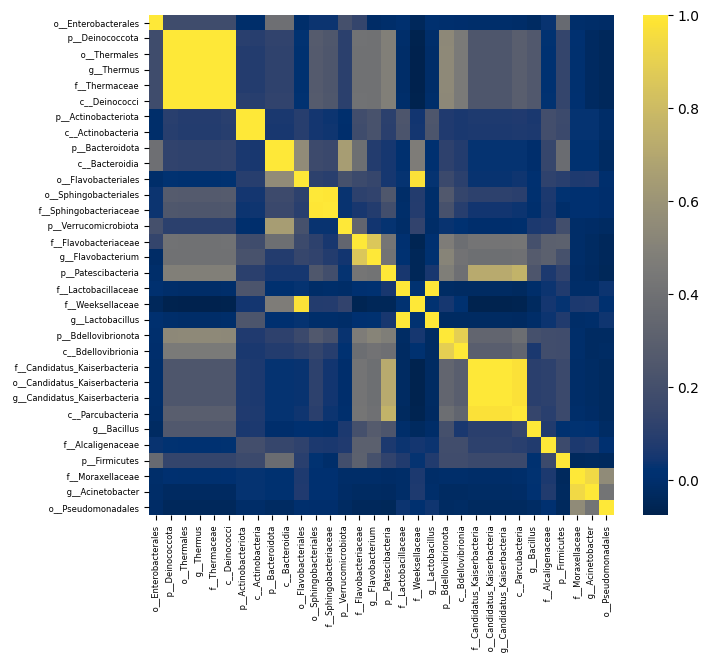

In [ ]:
selected_feature_data=comp_data[temp_arr_names]
selected_feature_data_copy = copy.deepcopy(selected_feature_data)
selected_feature_data

# Set the font size for the x and y labels
label_font_size = 6  # Change this to your desired font size

# Create the heatmap
fig = plt.figure(figsize=(7.5, 6.5))
ax = sns.heatmap(selected_feature_data.corr(), cmap="cividis", annot=False)

# Change the font size of x and y axis labels
ax.set_xticklabels(ax.get_xticklabels(), size=label_font_size)
ax.set_yticklabels(ax.get_yticklabels(), size=label_font_size)

# Show the plot
#plt.savefig("lda_corr.svg")
plt.show()

# Save the plot to an image file with a larger size
# Adjust the DPI and format as needed
ax.get_figure().savefig("heatmap.svg", dpi=600, bbox_inches='tight', format='svg')
ax.get_figure().savefig("heatmap.png", dpi=600, bbox_inches='tight', format='png')


In [ ]:
selected_feature_data.corr()


o__Enterobacterales   p__Deinococcota  \
 o__Enterobacterales                       1.000000          0.178223   
 p__Deinococcota                           0.178223          1.000000   
 o__Thermales                              0.178478          0.999687   
 g__Thermus                                0.178482          0.999686   
 f__Thermaceae                             0.178478          0.999687   
 c__Deinococci                             0.178223          1.000000   
 p__Actinobacteriota                      -0.006999          0.096545   
 c__Actinobacteria                        -0.008188          0.094941   
 p__Bacteroidota                           0.392111          0.124569   
 c__Bacteroidia                            0.392111          0.124569   
 o__Flavobacteriales                      -0.008311          0.022096   
 o__Sphingobacteriales                     0.035177          0.269793   
 f__Sphingobacteriaceae                    0.033915          0.244747   
 p__Verrucomicrobiota                      0.201237          0.108062   
 f__Flavobacteriaceae                      0.138081          0.404131   
 g__Flavobacterium                        -0.015440          0.402410   
 p__Patescibacteria                       -0.006027          0.484927   
 f__Lactobacillaceae                       0.003885         -0.005137   
 f__Weeksellaceae                         -0.039233         -0.069977   
 g__Lactobacillus                          0.004976         -0.008970   
 p__Bdellovibrionota                      -0.000546          0.537144   
 c__Bdellovibrionia                       -0.002231          0.449393   
 f__Candidatus_Kaiserbacteria             -0.006866          0.241280   
 o__Candidatus_Kaiserbacteria             -0.006866          0.241280   
 g__Candidatus_Kaiserbacteria             -0.006866          0.241280   
 c__Parcubacteria                         -0.010324          0.289814   
 g__Bacillus                              -0.025626          0.254467   
 f__Alcaligenaceae                         0.031176          0.022158   
 p__Firmicutes                             0.359025          0.134973   
 f__Moraxellaceae                         -0.008175          0.008134   
 g__Acinetobacter                         -0.010158         -0.026822   
 o__Pseudomonadales                       -0.016238         -0.039380   

                                o__Thermales   g__Thermus   f__Thermaceae  \
 o__Enterobacterales                0.178478     0.178482        0.178478   
 p__Deinococcota                    0.999687     0.999686        0.999687   
 o__Thermales                       1.000000     1.000000        1.000000   
 g__Thermus                         1.000000     1.000000        1.000000   
 f__Thermaceae                      1.000000     1.000000        1.000000   
 c__Deinococci                      0.999687     0.999686        0.999687   
 p__Actinobacteriota                0.084523     0.084535        0.084523   
 c__Actinobacteria                  0.082892     0.082904        0.082892   
 p__Bacteroidota                    0.121180     0.121199        0.121180   
 c__Bacteroidia                     0.121180     0.121199        0.121180   
 o__Flavobacteriales                0.015499     0.015523        0.015499   
 o__Sphingobacteriales              0.268163     0.268165        0.268163   
 f__Sphingobacteriaceae             0.243092     0.243094        0.243092   
 p__Verrucomicrobiota               0.106236     0.106242        0.106236   
 f__Flavobacteriaceae               0.402793     0.402800        0.402793   
 g__Flavobacterium                  0.400588     0.400596        0.400588   
 p__Patescibacteria                 0.485792     0.485804        0.485792   
 f__Lactobacillaceae               -0.009041    -0.009033       -0.009041   
 f__Weeksellaceae                  -0.076287    -0.076265       -0.076287   
 g__Lactobacillus                  -0.012972    -0.012965       -0.012972   
 p__B

In [ ]:
import pandas as pd

# Assuming you have already defined your 'selected_feature_data' DataFrame and calculated the correlation matrix
correlation_matrix = selected_feature_data.corr()

# Save the correlation matrix to an Excel file (in this example, we're using XLSX format)
correlation_matrix.to_excel('correlation_matrix.xlsx', sheet_name='Correlation')


In [ ]:
# Create correlation matrix
corr_matrix = selected_feature_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

# Drop features
selected_feature_data.drop(to_drop, axis=1, inplace=True)

<ipython-input-55-caafe94109fc>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# selected_feature_data.drop([" g__uncultured"],axis=1,inplace=True)
selected_feature_data[" g__Thermus"] = selected_feature_data_copy[" g__Thermus"]
selected_feature_data

<ipython-input-56-9c7a643aa5d8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



o__Enterobacterales   p__Deinococcota   p__Actinobacteriota  \
SRR3991444                     0                 0                     2   
SRR3991609                     0                 0                    54   
SRR3991531                    17              1154                    63   
SRR3991495                    41              1121                     5   
SRR3991554                     0                 0                     6   
...                          ...               ...                   ...   
SRR3991502                     2              1628                   147   
SRR3991543                     0                 0                     0   
SRR3991594                     0                 0                     0   
SRR3991499                     0              1003                    55   
SRR3991582                     0                 0                     0   

             p__Bacteroidota   o__Flavobacteriales   o__Sphingobacteriales  \
SRR3991444                 0                     0                       0   
SRR3991609                51                    26                      25   
SRR3991531               204                     0                       0   
SRR3991495               239                     0                       0   
SRR3991554                83                    83                       0   
...                      ...                   ...                     ...   
SRR3991502                32                    32                       0   
SRR3991543               162                   162                       0   
SRR3991594                19                    19                       0   
SRR3991499                32                    32                       0   
SRR3991582                56                    56                       0   

             p__Verrucomicrobiota   f__Flavobacteriaceae   g__Flavobacterium  \
SRR3991444                      0                      0                   0   
SRR3991609                      0                      0                   0   
SRR3991531                      0                      0                   0   
SRR3991495                      0                      0                   0   
SRR3991554                      0                      0                   0   
...                           ...                    ...                 ...   
SRR3991502                      0                     30                  30   
SRR3991543                      0                      0                   0   
SRR3991594                      0                      0                   0   
SRR3991499                      0                      0                   0   
SRR3991582                      0                      0                   0   

             p__Patescibacteria  ...   c__Bdellovibrionia  \
SRR3991444                    0  ...                    0   
SRR3991609                    0  ...                    0   
SRR3991531                   28  ...                   37   
SRR3991495                   26  ...                    0   
SRR3991554                    0  ...                    0   
...                         ...  ...                  ...   
SRR3991502                    7  ...                    0   
SRR3991543                    0  ...                    0   
SRR3991594                    0  ...                    0   
SRR3991499                   17  ...                    0   
SRR3991582                    0  ...                    0   

             f__Candidatus_Kaiserbacteria   c__Parcubacteria   g__Bacillus  \
SRR3991444                              0                  0             0   
SRR3991609                              0                  0             0   
SRR3991531                              0                  0             0   
SRR3991495                              0                  0            17   
SRR3991554                              0                  0             0   
.

In [ ]:
print("Old columns:-")
print(list(selected_feature_data_copy.columns))
print("New columns:-")
print(list(selected_feature_data.columns))

Old columns:-
[' o__Enterobacterales', ' p__Deinococcota', ' o__Thermales', ' g__Thermus', ' f__Thermaceae', ' c__Deinococci', ' p__Actinobacteriota', ' c__Actinobacteria', ' p__Bacteroidota', ' c__Bacteroidia', ' o__Flavobacteriales', ' o__Sphingobacteriales', ' f__Sphingobacteriaceae', ' p__Verrucomicrobiota', ' f__Flavobacteriaceae', ' g__Flavobacterium', ' p__Patescibacteria', ' f__Lactobacillaceae', ' f__Weeksellaceae', ' g__Lactobacillus', ' p__Bdellovibrionota', ' c__Bdellovibrionia', ' f__Candidatus_Kaiserbacteria', ' o__Candidatus_Kaiserbacteria', ' g__Candidatus_Kaiserbacteria', ' c__Parcubacteria', ' g__Bacillus', ' f__Alcaligenaceae', ' p__Firmicutes', ' f__Moraxellaceae', ' g__Acinetobacter', ' o__Pseudomonadales']
New columns:-
[' o__Enterobacterales', ' p__Deinococcota', ' p__Actinobacteriota', ' p__Bacteroidota', ' o__Flavobacteriales', ' o__Sphingobacteriales', ' p__Verrucomicrobiota', ' f__Flavobacteriaceae', ' g__Flavobacterium', ' p__Patescibacteria', ' f__Lactobaci

**Including Meta Data**

In [ ]:
meta_data=pd.read_csv("/content/Data_For_Biomarker_Analysis/Main_Data/Meta_Data.tsv",sep='\t')
meta_data.drop([0],axis=0,inplace=True)
meta_data

Sample-id Assay Type AvgSpotLen     Bases   BioProject     BioSample  \
1    SRR3991333   AMPLICON        494    290638  PRJNA303190  SAMN04293251   
2    SRR3991334   AMPLICON        562  40944229  PRJNA303190  SAMN04293128   
3    SRR3991335   AMPLICON        563  49094218  PRJNA303190  SAMN04293107   
4    SRR3991336   AMPLICON        553  25651309  PRJNA303190  SAMN04293170   
5    SRR3991337   AMPLICON        559  12611208  PRJNA303190  SAMN04293230   
..          ...        ...        ...       ...          ...           ...   
297  SRR3991629   AMPLICON        554  30416819  PRJNA303190  SAMN04293116   
298  SRR3991630   AMPLICON        545  23962868  PRJNA303190  SAMN04293072   
299  SRR3949651   AMPLICON        280    119917  PRJNA303190  SAMN04293251   
300  SRR3949767   AMPLICON        280    119917  PRJNA303190  SAMN04293251   
301  SRR3951024   AMPLICON        280    119917  PRJNA303190  SAMN04293251   

                                 BioSampleModel     Bytes  \
1    MIMS.me,MIGS/MIMS/MIMARKS.human-associated    250912   
2    MIMS.me,MIGS/MIMS/MIMARKS.human-associated  22671876   
3    MIMS.me,MIGS/MIMS/MIMARKS.human-associated  27088499   
4    MIMS.me,MIGS/MIMS/MIMARKS.human-associated  14696743   
5    MIMS.me,MIGS/MIMS/MIMARKS.human-associated   7241291   
..                                          ...       ...   
297  MIMS.me,MIGS/MIMS/MIMARKS.human-associated  17214110   
298  MIMS.me,MIGS/MIMS/MIMARKS.human-associated  13960511   
299  MIMS.me,MIGS/MIMS/MIMARKS.human-associated    155420   
300  MIMS.me,MIGS/MIMS/MIMARKS.human-associated    155420   
301  MIMS.me,MIGS/MIMS/MIMARKS.human-associated    155420   

                   Center Name Consent  ... LibraryLayout LibrarySelection  \
1    NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
2    NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
3    NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
4    NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
5    NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
..                         ...     ...  ...           ...              ...   
297  NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
298  NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
299  NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
300  NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   
301  NATIONAL CANCER INSTITUTE  public  ...        PAIRED              PCR   

    LibrarySource               Organism  Platform           ReleaseDate  \
1     METAGENOMIC  human lung metagenome  ILLUMINA  2016-08-01T00:00:00Z   
2     METAGENOMIC  human lung metagenome  ILLUMINA  2016-08-01T00:00:00Z   
3     METAGENOMIC  human lung metagenome  ILLUMINA  2016-08-01T00:00:00Z   
4     METAGENOMIC  human lung metagenome  ILLUMINA  2016-08-01T00:00:00Z   
5     METAGENOMIC  human lung metagenome  ILLUMINA  2016-08-01T00:00:00Z   
..            ...                    ...       ...                   ...   
297   METAGENOMIC  human lung metagenome  ILLUMINA  2016-08-01T00:00:00Z   
298   METAGENOMIC  human lung metagenome  ILLUMINA  2016-08-01T00:00:00Z   
299   METAGENOMIC  human lung metagenome  ILLUMINA  2016-07-25T00:00:00Z   
300   METAGENOMIC  human lung metagenome  ILLUMINA  2016-07-25T00:00:00Z   
301   METAGENOMIC  human lung metagenome  ILLUMINA  2016-07-25T00:00:00Z   

    Sample Name source_material_ID  SRA Study  \
1     MSB000096          MSB000096  SRP077571   
2     MSB000097          MSB000097  SRP077571   
3     MSB000098          MSB000098  SRP077571   
4     MSB000099          MSB000099  SRP077571   
5     MSB000100          MSB000100  SRP077571   
..          ...                ...        ...   
297   MSB000500          MSB000500  SRP077571   
298   MSB000501          MSB000501  SRP077571   
299   MSB000096          MSB000096  SRP077571

**Choosing the important columns**

In [ ]:
print(meta_data.columns)

Index([' Sample-id', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject',
       'BioSample', 'BioSampleModel', 'Bytes', 'Center Name', 'Consent',
       'DATASTORE filetype', 'DATASTORE provider', 'DATASTORE region',
       'env_biome', 'env_feature', 'env_material', 'Ethnicity', 'Experiment',
       'geo_loc_name_country', 'geo_loc_name_country_continent',
       'geo_loc_name', 'Host_Age', 'Host_disease', 'Host', 'host_sex',
       'host_subject_ID', 'host_tissue_sampled', 'Instrument', 'Library Name',
       'LibraryLayout', 'LibrarySelection', 'LibrarySource', 'Organism',
       'Platform', 'ReleaseDate', 'Sample Name', 'source_material_ID',
       'SRA Study', 'smoker'],
      dtype='object')


**Choosing env_material, Host_Age, host_sex, smoker**

In [ ]:
# [" Sample-id","env_material","Host_Age","host_sex","smoker"]
meta_data=meta_data[[" Sample-id","env_material","Host_Age","host_sex","smoker"]]
meta_data

Sample-id               env_material  Host_Age host_sex  \
1    SRR3991333  lung non-malignant tissue  63.91513     male   
2    SRR3991334  lung non-malignant tissue  62.71321   female   
3    SRR3991335  lung non-malignant tissue  74.17385     male   
4    SRR3991336  lung non-malignant tissue  64.72827     male   
5    SRR3991337  lung non-malignant tissue  58.65572     male   
..          ...                        ...       ...      ...   
297  SRR3991629  lung non-malignant tissue  73.14716     male   
298  SRR3991630  lung non-malignant tissue    62.141     male   
299  SRR3949651  lung non-malignant tissue  63.91513     male   
300  SRR3949767  lung non-malignant tissue  63.91513     male   
301  SRR3951024  lung non-malignant tissue  63.91513     male   

                                 smoker  
1    smoker quit for less than 6 months  
2    smoker quit for less than 6 months  
3     smoker quit for at least 6 months  
4    smoker quit for less than 6 months  
5    smoker quit for less than 6 months  
..                                  ...  
297  smoker quit for less than 6 months  
298  smoker quit for less than 6 months  
299  smoker quit for less than 6 months  
300  smoker quit for less than 6 months  
301  smoker quit for less than 6 months  

[301 rows x 5 columns]

In [ ]:
meta_data_np=np.array(meta_data)
print(meta_data_np)

temp_sample_dict={}

for i in range(len(meta_data_np)):
  temp_sample_dict[meta_data_np[i,0]]=meta_data_np[i,1:]

[['SRR3991333' 'lung non-malignant tissue' '63.91513' 'male'
  'smoker quit for less than 6 months']
 ['SRR3991334' 'lung non-malignant tissue' '62.71321' 'female'
  'smoker quit for less than 6 months']
 ['SRR3991335' 'lung non-malignant tissue' '74.17385' 'male'
  'smoker quit for at least 6 months']
 ...
 ['SRR3949651' 'lung non-malignant tissue' '63.91513' 'male'
  'smoker quit for less than 6 months']
 ['SRR3949767' 'lung non-malignant tissue' '63.91513' 'male'
  'smoker quit for less than 6 months']
 ['SRR3951024' 'lung non-malignant tissue' '63.91513' 'male'
  'smoker quit for less than 6 months']]


In [ ]:
temp_sample_dict

{'SRR3991333': array(['lung non-malignant tissue', '63.91513', 'male',
        'smoker quit for less than 6 months'], dtype=object),
 'SRR3991334': array(['lung non-malignant tissue', '62.71321', 'female',
        'smoker quit for less than 6 months'], dtype=object),
 'SRR3991335': array(['lung non-malignant tissue', '74.17385', 'male',
        'smoker quit for at least 6 months'], dtype=object),
 'SRR3991336': array(['lung non-malignant tissue', '64.72827', 'male',
        'smoker quit for less than 6 months'], dtype=object),
 'SRR3991337': array(['lung non-malignant tissue', '58.65572', 'male',
        'smoker quit for less than 6 months'], dtype=object),
 'SRR3991338': array(['lung non-malignant tissue', '76.55031', 'male',
        'smoker quit for less than 6 months'], dtype=object),
 'SRR3991339': array(['lung tumor tissue', '76.17796', 'male',
        'smoker quit for less than 6 months'], dtype=object),
 'SRR3991340': array(['lung non-malignant tissue', '69.20192', 'male', nan],

In [ ]:
temp_sample_names=list(selected_feature_data.index)

chosen_meta_data_np=[]

for i in range(len(temp_sample_names)):
  chosen_meta_data_np.append(temp_sample_dict[temp_sample_names[i]])

chosen_meta_data_np=np.array(chosen_meta_data_np)
chosen_meta_data_np

chosen_meta_data=pd.DataFrame(chosen_meta_data_np,index=temp_sample_names,columns=list(meta_data.columns)[1:])
chosen_meta_data

env_material  Host_Age host_sex  \
SRR3991444          lung tumor tissue   70.5243     male   
SRR3991609  lung non-malignant tissue  51.10472     male   
SRR3991531  lung non-malignant tissue  54.15469     male   
SRR3991495          lung tumor tissue    65.295   female   
SRR3991554          lung tumor tissue  78.31075     male   
...                               ...       ...      ...   
SRR3991502  lung non-malignant tissue  64.53662     male   
SRR3991543  lung non-malignant tissue  64.95551     male   
SRR3991594          lung tumor tissue  69.24025     male   
SRR3991499          lung tumor tissue  40.52293     male   
SRR3991582  lung non-malignant tissue  66.57906     male   

                                        smoker  
SRR3991444   smoker quit for at least 6 months  
SRR3991609  smoker quit for less than 6 months  
SRR3991531   smoker quit for at least 6 months  
SRR3991495                        never smoker  
SRR3991554   smoker quit for at least 6 months  
...                                        ...  
SRR3991502  smoker quit for less than 6 months  
SRR3991543  smoker quit for less than 6 months  
SRR3991594  smoker quit for less than 6 months  
SRR3991499  smoker quit for less than 6 months  
SRR3991582  smoker quit for less than 6 months  

[279 rows x 4 columns]

**For the Data Labels**

In [ ]:
stan_data_np=np.array(stan_data)
list_sample_names=list(stan_data.index)

temp_sample_dict={}

for i in range(len(stan_data_np)):
  temp_sample_dict[list_sample_names[i]]=stan_data_np[i,len(stan_data_np[0])-1]



In [ ]:
temp_sample_dict

{'SRR3991444': 1,
 'SRR3991609': 0,
 'SRR3991531': 1,
 'SRR3991495': 0,
 'SRR3991554': 1,
 'SRR3991568': 1,
 'SRR3991477': 0,
 'SRR3991372': 1,
 'SRR3991625': 0,
 'SRR3991604': 0,
 'SRR3991441': 1,
 'SRR3991440': 1,
 'SRR3991569': 1,
 'SRR3991382': 0,
 'SRR3991507': 1,
 'SRR3991549': 1,
 'SRR3991607': 0,
 'SRR3991379': 0,
 'SRR3991369': 0,
 'SRR3991353': 0,
 'SRR3991505': 0,
 'SRR3991513': 0,
 'SRR3991534': 0,
 'SRR3991610': 1,
 'SRR3991511': 0,
 'SRR3991364': 1,
 'SRR3991510': 1,
 'SRR3991472': 1,
 'SRR3991584': 1,
 'SRR3991399': 1,
 'SRR3991517': 0,
 'SRR3991597': 1,
 'SRR3991519': 0,
 'SRR3991503': 0,
 'SRR3991398': 0,
 'SRR3991350': 0,
 'SRR3991613': 0,
 'SRR3991526': 0,
 'SRR3991425': 1,
 'SRR3991493': 0,
 'SRR3991479': 0,
 'SRR3991605': 0,
 'SRR3991508': 1,
 'SRR3991465': 0,
 'SRR3991481': 1,
 'SRR3991608': 0,
 'SRR3991588': 0,
 'SRR3991524': 0,
 'SRR3991491': 0,
 'SRR3991419': 1,
 'SRR3991368': 0,
 'SRR3991427': 1,
 'SRR3991352': 0,
 'SRR3991563': 1,
 'SRR3991548': 0,
 'SRR39915

**Combining Meta data with taxa data**

In [ ]:
chosen_column1_np=np.array(selected_feature_data)
chosen_column2_np=np.array(chosen_meta_data)

data=np.array(stan_data)

x_data=np.c_[chosen_column1_np,chosen_column2_np]
print(np.shape(x_data))


result_data=pd.DataFrame(x_data,index=selected_feature_data.index,columns=list(selected_feature_data.columns)+list(chosen_meta_data.columns))

temp_na_data = copy.deepcopy(result_data)

#For seeing the Na elements
list_names_selected_feature_data=list(temp_na_data.index)
y_data_temp=[]
for i in range(len(list_names_selected_feature_data)):
  y_data_temp.append(temp_sample_dict[list_names_selected_feature_data[i]])

temp_na_data["label"]=y_data_temp


print(temp_na_data[temp_na_data.isnull().any(axis=1)])

#Removing The Na
result_data.dropna(inplace=True)

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

result_data["env_material"]=le1.fit_transform(result_data["env_material"])
result_data["host_sex"]=le2.fit_transform(result_data["host_sex"])
result_data["smoker"]=le3.fit_transform(result_data["smoker"])



result_data

(279, 27)
            o__Enterobacterales  p__Deinococcota  p__Actinobacteriota  \
SRR3991507                    0                2                   67   
SRR3991472                    0                0                    0   
SRR3991615                    0                0                    0   
SRR3991448                   48                0                    0   
SRR3991449                    0                0                    0   

            p__Bacteroidota  o__Flavobacteriales  o__Sphingobacteriales  \
SRR3991507               59                   38                      0   
SRR3991472             1311                 1311                      0   
SRR3991615              160                  160                      0   
SRR3991448              289                  289                      0   
SRR3991449               50                   50                      0   

            p__Verrucomicrobiota  f__Flavobacteriaceae  g__Flavobacterium  \
SRR3991507             

o__Enterobacterales  p__Deinococcota  p__Actinobacteriota  \
SRR3991444                    0                0                    2   
SRR3991609                    0                0                   54   
SRR3991531                   17             1154                   63   
SRR3991495                   41             1121                    5   
SRR3991554                    0                0                    6   
...                         ...              ...                  ...   
SRR3991502                    2             1628                  147   
SRR3991543                    0                0                    0   
SRR3991594                    0                0                    0   
SRR3991499                    0             1003                   55   
SRR3991582                    0                0                    0   

            p__Bacteroidota  o__Flavobacteriales  o__Sphingobacteriales  \
SRR3991444                0                    0                      0   
SRR3991609               51                   26                     25   
SRR3991531              204                    0                      0   
SRR3991495              239                    0                      0   
SRR3991554               83                   83                      0   
...                     ...                  ...                    ...   
SRR3991502               32                   32                      0   
SRR3991543              162                  162                      0   
SRR3991594               19                   19                      0   
SRR3991499               32                   32                      0   
SRR3991582               56                   56                      0   

            p__Verrucomicrobiota  f__Flavobacteriaceae  g__Flavobacterium  \
SRR3991444                     0                     0                  0   
SRR3991609                     0                     0                  0   
SRR3991531                     0                     0                  0   
SRR3991495                     0                     0                  0   
SRR3991554                     0                     0                  0   
...                          ...                   ...                ...   
SRR3991502                     0                    30                 30   
SRR3991543                     0                     0                  0   
SRR3991594                     0                     0                  0   
SRR3991499                     0                     0                  0   
SRR3991582                     0                     0                  0   

            p__Patescibacteria  ...  f__Alcaligenaceae  p__Firmicutes  \
SRR3991444                   0  ...                  0              9   
SRR3991609                   0  ...                  0             62   
SRR3991531                  28  ...                  0            105   
SRR3991495                  26  ...                  0            170   
SRR3991554                   0  ...                  0            172   
...                        ...  ...                ...            ...   
SRR3991502                   7  ...                  0            192   
SRR3991543                   0  ...                  0              0   
SRR3991594                   0  ...                  2           1481   
SRR3991499                  17  ...                  0            144   
SRR3991582                   0  ...                  0             46   

            f__Moraxellaceae  g__Acinetobacter  o__Pseudomonadales  \
SRR3991444                 2                 2                   2   
SRR3991609                 0                 0                   0   
SRR3991531               193                44                 205   
SRR3991495               163                25                 165   
SRR3991554                44                43                  51   
...         

In [ ]:
# temp_arr_taxa=[" p__Deinococcota"," c__Deinococci"," o__Thermales"," g__Thermus"]

# for i in range(len(temp_arr_taxa)):
#   temp=list(result_data[temp_arr_taxa[i]])
#   print(temp)

In [ ]:
list_names_selected_feature_data=list(result_data.index)
y_data=[]
for i in range(len(list_names_selected_feature_data)):
  y_data.append(temp_sample_dict[list_names_selected_feature_data[i]])

result_data["label"]=y_data

In [ ]:
print(le1.inverse_transform([0,1]))
print(le2.inverse_transform([0,1]))
print(le3.inverse_transform([0,1,2]))


['lung non-malignant tissue' 'lung tumor tissue']
['female' 'male']
['never smoker' 'smoker quit for at least 6 months'
 'smoker quit for less than 6 months']


In [ ]:
stan_data_np=np.array(stan_data).astype(int)
print("Number of features are:-",len(stan_data_np[0])-1)
print("Total Number of Instances are:-",len(+stan_data_np))

result_data_np=np.array(result_data).astype(float)
print("Number of features are:-",len(result_data_np[0])-1)
print("Total Number of Instances are:-",len(result_data_np))

Number of features are:- 3607
Total Number of Instances are:- 279
Number of features are:- 27
Total Number of Instances are:- 274


In [ ]:
print("0-->",le.inverse_transform([0]),"1-->",le.inverse_transform([1]))

0--> ['Adenocarcinoma'] 1--> ['Squamous']


In [ ]:
stan_data

Otu1 Otu2 Otu3 Otu4 Otu5 Otu6 Otu7 Otu8 Otu9 Otu10  ... Otu3599  \
SRR3991444    6    4    3    3    3    3    3    2    2     2  ...       0   
SRR3991609    0    3    1    0    0    0    3    0    5     7  ...       0   
SRR3991531    1    0    0    0    4    0    0    0    3     0  ...       0   
SRR3991495   13   19    3    0    0    0    0    0   16     0  ...       0   
SRR3991554    0    0    0    0   16    0    0    0    0     0  ...       0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...     ...   
SRR3991502    0    0    3    0   15    0    0    0    0     0  ...       0   
SRR3991543    0    0   23    0   50    0    0    0    0     0  ...       0   
SRR3991594    3    2    0    0    0    1    0    0    1     0  ...       0   
SRR3991499    3    4    0    0    0    0    0    0    9     0  ...       0   
SRR3991582    0    0    6    0    5    0    0    0    0     0  ...       0   

           Otu3600 Otu3601 Otu3602 Otu3603 Otu3604 Otu3605 Otu3606 Otu3607  \
SRR3991444       0       0       0       0       0       0       0       0   
SRR3991609       0       0       0       0       0       0       0       0   
SRR3991531       0       0       0       0       0       0       0       0   
SRR3991495       0       0       0       0       0       0       0       0   
SRR3991554       0       0       0       0       0       0       0       0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
SRR3991502       0       0       0       0       0       0       0       0   
SRR3991543       0      36      27      25      24      24      23      19   
SRR3991594       0       0       0       0       0       0       0       0   
SRR3991499       0       0       0       0       0       0       0       0   
SRR3991582       0       0       0       0       0       0       0       0   

           label  
SRR3991444     1  
SRR3991609     0  
SRR3991531     1  
SRR3991495     0  
SRR3991554     1  
...          ...  
SRR3991502     0  
SRR3991543     1  
SRR3991594     1  
SRR3991499     0  
SRR3991582     0  

[279 rows x 3608 columns]

In [ ]:
result_data

o__Enterobacterales  p__Deinococcota  p__Actinobacteriota  \
SRR3991444                    0                0                    2   
SRR3991609                    0                0                   54   
SRR3991531                   17             1154                   63   
SRR3991495                   41             1121                    5   
SRR3991554                    0                0                    6   
...                         ...              ...                  ...   
SRR3991502                    2             1628                  147   
SRR3991543                    0                0                    0   
SRR3991594                    0                0                    0   
SRR3991499                    0             1003                   55   
SRR3991582                    0                0                    0   

            p__Bacteroidota  o__Flavobacteriales  o__Sphingobacteriales  \
SRR3991444                0                    0                      0   
SRR3991609               51                   26                     25   
SRR3991531              204                    0                      0   
SRR3991495              239                    0                      0   
SRR3991554               83                   83                      0   
...                     ...                  ...                    ...   
SRR3991502               32                   32                      0   
SRR3991543              162                  162                      0   
SRR3991594               19                   19                      0   
SRR3991499               32                   32                      0   
SRR3991582               56                   56                      0   

            p__Verrucomicrobiota  f__Flavobacteriaceae  g__Flavobacterium  \
SRR3991444                     0                     0                  0   
SRR3991609                     0                     0                  0   
SRR3991531                     0                     0                  0   
SRR3991495                     0                     0                  0   
SRR3991554                     0                     0                  0   
...                          ...                   ...                ...   
SRR3991502                     0                    30                 30   
SRR3991543                     0                     0                  0   
SRR3991594                     0                     0                  0   
SRR3991499                     0                     0                  0   
SRR3991582                     0                     0                  0   

            p__Patescibacteria  ...  p__Firmicutes  f__Moraxellaceae  \
SRR3991444                   0  ...              9                 2   
SRR3991609                   0  ...             62                 0   
SRR3991531                  28  ...            105               193   
SRR3991495                  26  ...            170               163   
SRR3991554                   0  ...            172                44   
...                        ...  ...            ...               ...   
SRR3991502                   7  ...            192               214   
SRR3991543                   0  ...              0                 0   
SRR3991594                   0  ...           1481                 0   
SRR3991499                  17  ...            144               315   
SRR3991582                   0  ...             46                 0   

            g__Acinetobacter  o__Pseudomonadales  g__Thermus env_material  \
SRR3991444                 2                   2           0            1   
SRR3991609                 0                   0           0            0   
SRR3991531                44                 205        1154            0   
SRR3991495                25                 165        1121            1   
SRR3991554                43                  51           

**Exploratory Data Analysis**

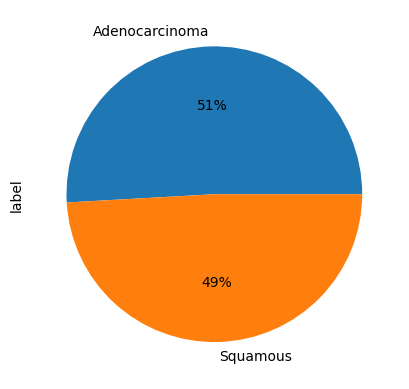

In [ ]:
org_data['label'].value_counts().plot(kind='pie', autopct = "%1.0f%%")
plt.show()

**Analysing types**

In [ ]:
result_data=result_data.astype(float)
result_data_np.dtype

dtype('float64')

In [ ]:
stan_data_np.dtype

dtype('int64')

**Data Description**

In [ ]:
def my_df_describe(df):
    objects = []
    numerics = []
    for c in df:
        if (df[c].dtype == object):
            objects.append(c)
        else:
            numerics.append(c)

    return df[numerics].describe(), df[objects].describe()

**Correlation Matrix**

In [ ]:
temp_data=result_data.astype(int)
px.imshow(temp_data.corr())

**Outlier Analysis**

In [ ]:
# fig = px.box(temp_data,y=' f__Thermaceae',x="env_material",title=f"Distrubution of Age")
# fig.show()

In [ ]:
def cat_of_list(l):
  l1=[]
  for i in l:
    if i not in l1:
      l1.append(i)
  return l1

def categories_output(d):
  l_col=list(d.columns)
  l1=[]
  d1={}
  for i in l_col:
    l=list(d[i])
    if (type(l[0])==str):
      l1.append(i)
      d1[i]=cat_of_list(l)
  print(d1)
  return d1;

def visualisation_bar_hist(data):
  l_col=list(data.columns)
  temp_cat=categories_output(data)
  temp_keys=list(temp_cat.keys())
  temp_values=list(temp_cat.values())

  for i in range(len(l_col)-1):
    if l_col[i] in temp_keys:
      label=l_col[i]
      temp_val=temp_cat[label]
      temp_list=[]
      temp_columns=list(data[label])
      for j in range(len(temp_val)):
        temp_list.append(temp_columns.count(temp_val[j]))

      plt.bar(temp_val,temp_list,color='red')
      plt.title(l_col[i]+"-Bar Graph")
      plt.ylabel("Frequency")
      plt.show()
      print()
    else:
      temp_columns=list(data[l_col[i]])
      sns.histplot(temp_columns,color="red",kde=True)
      plt.title(l_col[i])
      plt.ylabel("Frequency")
      plt.show()
      print()

# visualisation_bar_hist(result_data)


In [ ]:
l_cols_result_data=list(result_data.columns)[0:len(result_data_np[0])-3]

result_data_no_out=copy.deepcopy(result_data)

# for i in range(len(l_cols_result_data)):
#   temp_=list(result_data_no_out[l_cols_result_data[i]])
#   # print(max(temp_))
#   result_data_no_out=result_data_no_out[result_data_no_out[l_cols_result_data[i]]<0.95*(max(temp_))]

In [ ]:
result_data_no_out

o__Enterobacterales   p__Deinococcota   p__Actinobacteriota  \
SRR3991444                   0.0               0.0                   2.0   
SRR3991609                   0.0               0.0                  54.0   
SRR3991531                  17.0            1154.0                  63.0   
SRR3991495                  41.0            1121.0                   5.0   
SRR3991554                   0.0               0.0                   6.0   
...                          ...               ...                   ...   
SRR3991502                   2.0            1628.0                 147.0   
SRR3991543                   0.0               0.0                   0.0   
SRR3991594                   0.0               0.0                   0.0   
SRR3991499                   0.0            1003.0                  55.0   
SRR3991582                   0.0               0.0                   0.0   

             p__Bacteroidota   o__Flavobacteriales   o__Sphingobacteriales  \
SRR3991444               0.0                   0.0                     0.0   
SRR3991609              51.0                  26.0                    25.0   
SRR3991531             204.0                   0.0                     0.0   
SRR3991495             239.0                   0.0                     0.0   
SRR3991554              83.0                  83.0                     0.0   
...                      ...                   ...                     ...   
SRR3991502              32.0                  32.0                     0.0   
SRR3991543             162.0                 162.0                     0.0   
SRR3991594              19.0                  19.0                     0.0   
SRR3991499              32.0                  32.0                     0.0   
SRR3991582              56.0                  56.0                     0.0   

             p__Verrucomicrobiota   f__Flavobacteriaceae   g__Flavobacterium  \
SRR3991444                    0.0                    0.0                 0.0   
SRR3991609                    0.0                    0.0                 0.0   
SRR3991531                    0.0                    0.0                 0.0   
SRR3991495                    0.0                    0.0                 0.0   
SRR3991554                    0.0                    0.0                 0.0   
...                           ...                    ...                 ...   
SRR3991502                    0.0                   30.0                30.0   
SRR3991543                    0.0                    0.0                 0.0   
SRR3991594                    0.0                    0.0                 0.0   
SRR3991499                    0.0                    0.0                 0.0   
SRR3991582                    0.0                    0.0                 0.0   

             p__Patescibacteria  ...   p__Firmicutes   f__Moraxellaceae  \
SRR3991444                  0.0  ...             9.0                2.0   
SRR3991609                  0.0  ...            62.0                0.0   
SRR3991531                 28.0  ...           105.0              193.0   
SRR3991495                 26.0  ...           170.0              163.0   
SRR3991554                  0.0  ...           172.0               44.0   
...                         ...  ...             ...                ...   
SRR3991502                  7.0  ...           192.0              214.0   
SRR3991543                  0.0  ...             0.0                0.0   
SRR3991594                  0.0  ...          1481.0                0.0   
SRR3991499                 17.0  ...           144.0              315.0   
SRR3991582                  0.0  ...            46.0                0.0   

             g__Acinetobacter   o__Pseudomonadales   g__Thermus  env_material  \
SRR3991444                2.0                  2.0          0.0           1.0   
SRR3991609                0.0                  0.0          0.0           0.0   
SRR3991531               44.0                205.0       1

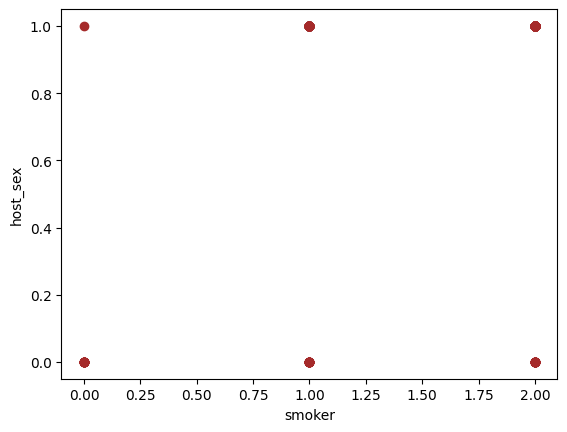

In [ ]:
#This function will basically give all the pairs of highly correlated features
def find_outliers(cov_data):
  l_cols=list(cov_data.columns)
  max_cov=-1
  in1=0
  in2=0
  for i in range(len(l_cols)):
    temp_l=list(cov_data[l_cols[i]])
    for j in range(len(l_cols)):
      if (max_cov<abs(temp_l[j]) and i!=j):
        in1=i
        in2=j

  return [l_cols[in1],l_cols[in2]]

#This is the x_data in pandas format
# x_data_pd=pd.DataFrame(x_data,columns=l_col_new[0:len(l_col_new)-1])
x_data_pd=result_data_no_out.drop(['label'],axis=1)

temp_outliers=find_outliers(x_data_pd.cov())

temp_data=x_data_pd.copy(deep=True)

for i in range(1):
  temp_outliers=find_outliers(temp_data.cov())
  plt.scatter(x_data_pd[temp_outliers[0]],x_data_pd[temp_outliers[1]],color="brown")
  plt.xlabel(temp_outliers[0])
  plt.ylabel(temp_outliers[1])
  temp_data=temp_data.drop([temp_outliers[0],temp_outliers[1]],axis=1)
  print("\n")
  plt.show()


**Data Preprocessing**

In [ ]:
x_data_pd=result_data_no_out.drop(['label'],axis=1)

#Normalisation
scaler = preprocessing.MinMaxScaler()

x_data_pd_stan=pd.DataFrame(scaler.fit_transform(x_data_pd),columns=x_data_pd.columns,index=x_data_pd.index)

x_data_pd_stan= x_data_pd

x_data_pd_stan["sample_id"] = result_data_no_out.index

x_data_pd['label']=result_data['label']

x_data_pd_stan['label']=result_data['label']


result_data=x_data_pd_stan


result_data_class0=result_data[result_data["label"]==0]
result_data_class1=result_data[result_data["label"]==1]

result_data_class_0_np=np.array(result_data_class0)
result_data_class_1_np=np.array(result_data_class1)

print(np.unique(result_data_class_0_np[:,len(result_data_class_0_np[0])-1]))
print(np.unique(result_data_class_1_np[:,len(result_data_class_1_np[0])-1]))

x_class_0=result_data_class_0_np[:,0:len(result_data_class_0_np[0])-1]
y_class_0=result_data_class_0_np[:,len(result_data_class_0_np[0])-1].astype(int)

x_class_1=result_data_class_1_np[:,0:len(result_data_class_1_np[0])-1]
y_class_1=result_data_class_1_np[:,len(result_data_class_1_np[0])-1].astype(int)

#CLASS 0
x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_class_0, y_class_0, test_size=0.3,shuffle=True, random_state=42)

#CLASS 1
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_class_1, y_class_1, test_size=0.3,shuffle=True, random_state=42)

#Train Data
x_train=np.r_[x_train_0,x_train_1]
y_train=np.r_[y_train_0,y_train_1]

sample_id_train = x_train[:,len(x_train[0])-1]

x_train = x_train[:,:len(x_train[0])-1].astype(float)



#Test Data
x_test=np.r_[x_test_0,x_test_1]
y_test=np.r_[y_test_0,y_test_1]

sample_id_test = x_test[:,len(x_test[0])-1]

x_test = x_test[:,:len(x_test[0])-1].astype(float)


print("Number of Instances in Training Data of class 0:-",len(x_train_0))
print("Number of Instances in Training Data of class 1:-",len(x_train_1))

print("Number of Instances in Testing Data of class 0:-",len(x_test_0))
print("Number of Instances in Testing Data of class 1:-",len(x_test_1))


[0.0]
[1.0]
Number of Instances in Training Data of class 0:- 99
Number of Instances in Training Data of class 1:- 92
Number of Instances in Testing Data of class 0:- 43
Number of Instances in Testing Data of class 1:- 40


**Applying LDA to the DATA**

In [ ]:
lda =LinearDiscriminantAnalysis().fit(x_train,y_train)

x_train = lda.transform(x_train)
x_test = lda.transform(x_test)

In [ ]:
import matplotlib.pyplot as plt


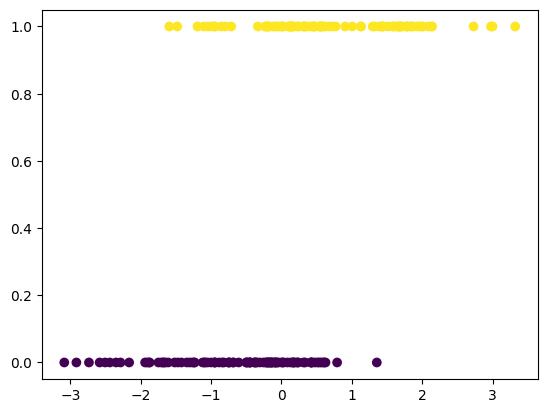

In [ ]:
plt.scatter(x_train,y_train.reshape(-1,1),c=y_train.reshape(-1,1))
plt.savefig("lda_plot.pdf",dpi=1200)
plt.savefig("lda_plot.svg")
plt.show()

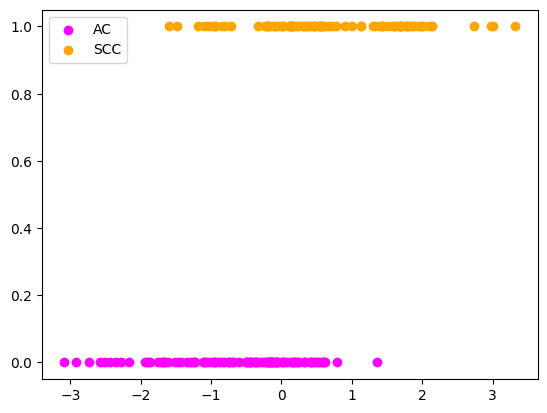

In [ ]:
plt.scatter(x_train[y_train==0],y_train.reshape(-1,1)[y_train==0],c='magenta',label="AC")
plt.scatter(x_train[y_train==1],y_train.reshape(-1,1)[y_train==1],c='orange',label="SCC")
plt.legend()
#plt.ylabel("Class Label")
plt.savefig("lda_before.pdf",dpi=1200)
plt.savefig("lda_before.svg")
plt.savefig("lda_before.png")
plt.show()

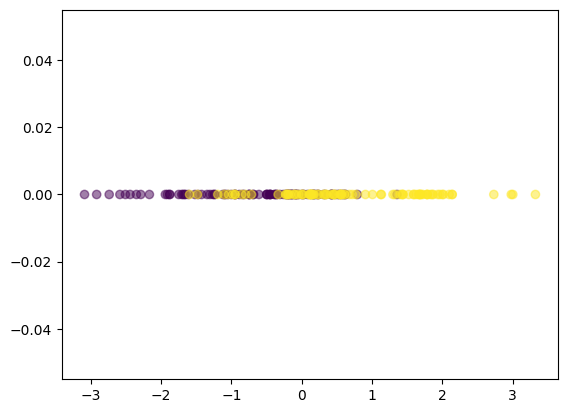

In [ ]:
plt.scatter(x_train,np.zeros((len(x_train),1)),c=y_train.reshape(-1,1),alpha=0.5)
plt.savefig("lda_after.svg")
plt.show()





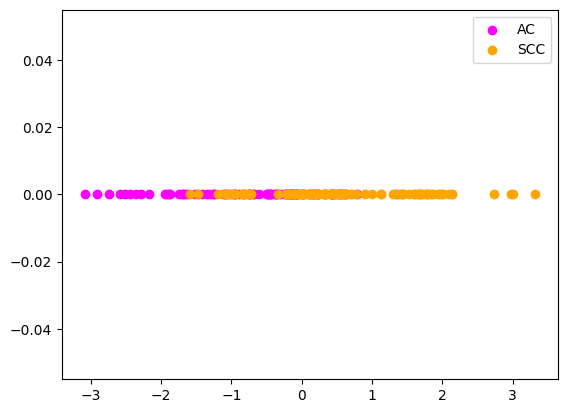

In [ ]:
plt.scatter(x_train[y_train==0],np.zeros((len(x_train[y_train==0]),1)),c='magenta',label="AC")
plt.scatter(x_train[y_train==1],np.zeros((len(x_train[y_train==1]),1)),c='orange',label="SCC")
plt.legend()
plt.savefig("lda_after.pdf",dpi=1200)
plt.savefig("lda_after.svg")
plt.savefig("lda_after.png")
plt.show()

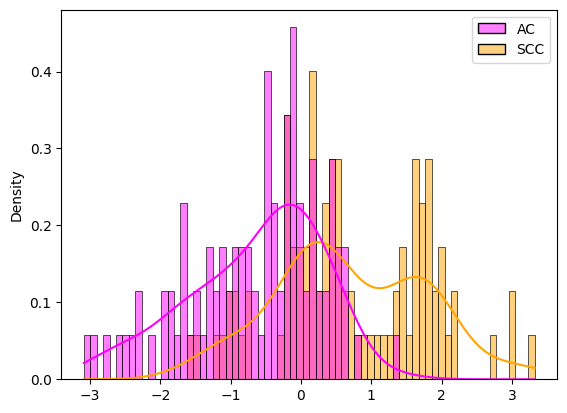

In [ ]:
class_0_train_samples = x_train[y_train==0]
class_1_train_samples = x_train[y_train==1]


sns.histplot({'AC': class_0_train_samples.ravel(), 'SCC': class_1_train_samples.ravel()}, bins=70, palette=['magenta', 'orange'], kde=True, stat='density')
plt.savefig("lda hist.png")
plt.show()



**Model Training**

**Logistic Regression**

In [ ]:
model_lr = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

print("Training Accuracy is:-",model_lr.score(x_train,y_train))
print("Classification Accuracy is:-",model_lr.score(x_test,y_test))

Training Accuracy is:- 0.7539267015706806
Classification Accuracy is:- 0.7469879518072289


In [ ]:
temp_arr=model_lr.coef_
print(temp_arr)
temp_arr.sort()
temp_arr

[[1.60841739]]


array([[1.60841739]])

In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.75      0.77      0.76        43
      Squamous       0.74      0.72      0.73        40

      accuracy                           0.75        83
     macro avg       0.75      0.75      0.75        83
  weighted avg       0.75      0.75      0.75        83



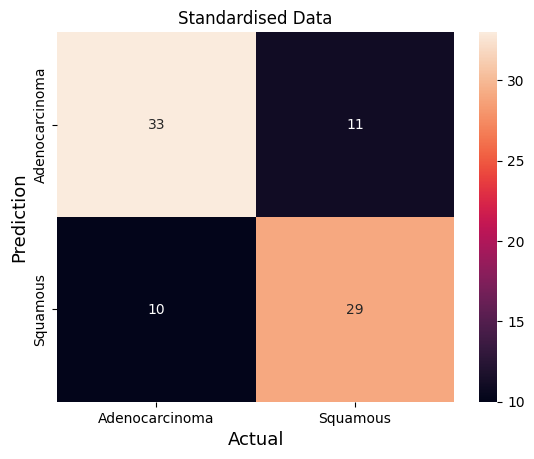

In [ ]:
dat_lr=confusion_matrix(y_pred_lr,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

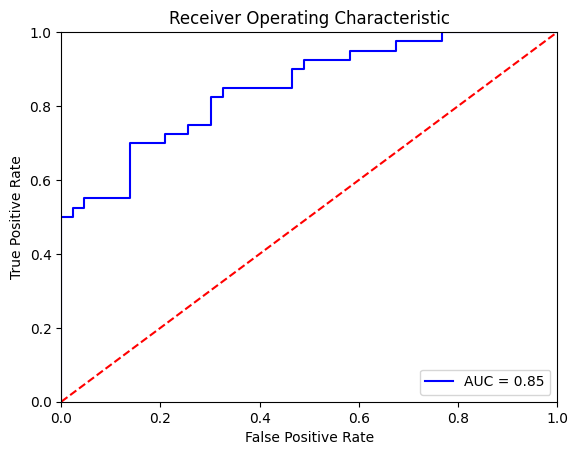

In [ ]:
probs = model_lr.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Gaussian Naive Bayes**

In [ ]:
model_nb = GaussianNB().fit(x_train,y_train)
y_pred_nb=model_nb.predict(x_test)

print("Training Accuracy is:-",model_nb.score(x_train,y_train))
print("Classification Accuracy is:-",model_nb.score(x_test,y_test))

Training Accuracy is:- 0.7696335078534031
Classification Accuracy is:- 0.7469879518072289


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_nb, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.76      0.74      0.75        43
      Squamous       0.73      0.75      0.74        40

      accuracy                           0.75        83
     macro avg       0.75      0.75      0.75        83
  weighted avg       0.75      0.75      0.75        83



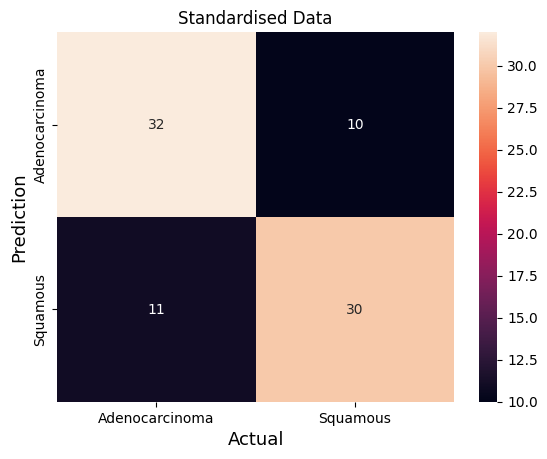

In [ ]:
dat_lr=confusion_matrix(y_pred_nb,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

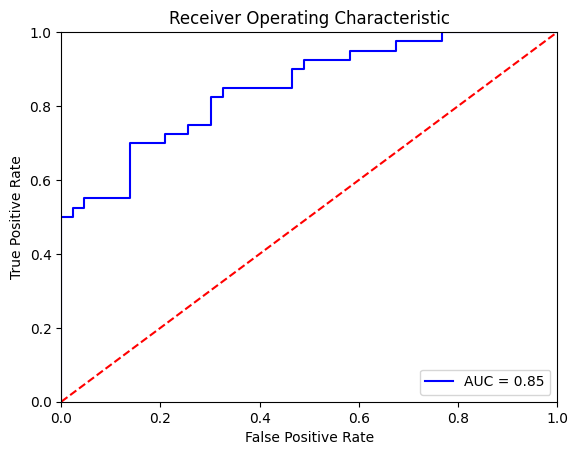

In [ ]:
probs = model_nb.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
skf = StratifiedKFold(n_splits=5)

**Decision Tree Classifier**

In [ ]:
def objective(trial):

  temp_acc = []

  max_depth = trial.suggest_int("max_depth", 1, 10)

  min_samples_split = trial.suggest_int("min_samples_split",2,50)

  min_samples_leaf = trial.suggest_int("min_samples_leaf",1,50)

  max_leaf_nodes = trial.suggest_int("max_leaf_nodes",5,100)

  #K-fold stratified Split
  for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    y_train_temp = y_train[train_index]
    x_train_temp = x_train[train_index]

    y_val_temp = y_train[test_index]
    x_val_temp = x_train[test_index]

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_leaf_nodes = max_leaf_nodes,random_state=42)

    #Training the Model
    model.fit(x_train_temp,y_train_temp.ravel())

    y_pred = model.predict(x_val_temp)

    v0 = metrics.accuracy_score(y_val_temp, y_pred)

    if (len(temp_data_np)==0):
      v0 = 0

    temp_acc.append(v0)

  return np.array(temp_acc).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print(study.best_params)


[I 2023-09-12 11:29:45,167] A new study created in memory with name: no-name-b0ebc762-c2e5-48aa-8a8a-83d97096443f
[I 2023-09-12 11:29:45,223] Trial 0 finished with value: 0.7748987854251013 and parameters: {'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 24, 'max_leaf_nodes': 48}. Best is trial 0 with value: 0.7748987854251013.
[I 2023-09-12 11:29:45,260] Trial 1 finished with value: 0.7696356275303644 and parameters: {'max_depth': 8, 'min_samples_split': 32, 'min_samples_leaf': 1, 'max_leaf_nodes': 36}. Best is trial 0 with value: 0.7748987854251013.
[I 2023-09-12 11:29:45,306] Trial 2 finished with value: 0.7748987854251013 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 34, 'max_leaf_nodes': 43}. Best is trial 0 with value: 0.7748987854251013.
[I 2023-09-12 11:29:45,333] Trial 3 finished with value: 0.7748987854251013 and parameters: {'max_depth': 2, 'min_samples_split': 46, 'min_samples_leaf': 21, 'max_leaf_nodes': 26}. Best is trial 0 with

{'max_depth': 6, 'min_samples_split': 24, 'min_samples_leaf': 10, 'max_leaf_nodes': 21}


In [ ]:
temp_dict = study.best_params

In [ ]:
max_depth = temp_dict["max_depth"]

min_samples_split = temp_dict["min_samples_split"]

min_samples_leaf = temp_dict["min_samples_leaf"]

max_leaf_nodes = temp_dict["max_leaf_nodes"]

In [ ]:
model_dc = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_leaf_nodes = max_leaf_nodes,random_state=42).fit(x_train,y_train)
y_pred_dc=model_dc.predict(x_test)

print("Training Accuracy is:-",model_dc.score(x_train,y_train))
print("Classification Accuracy is:-",model_dc.score(x_test,y_test))

Training Accuracy is:- 0.8324607329842932
Classification Accuracy is:- 0.7228915662650602


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_dc, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.72      0.77      0.74        43
      Squamous       0.73      0.68      0.70        40

      accuracy                           0.72        83
     macro avg       0.72      0.72      0.72        83
  weighted avg       0.72      0.72      0.72        83



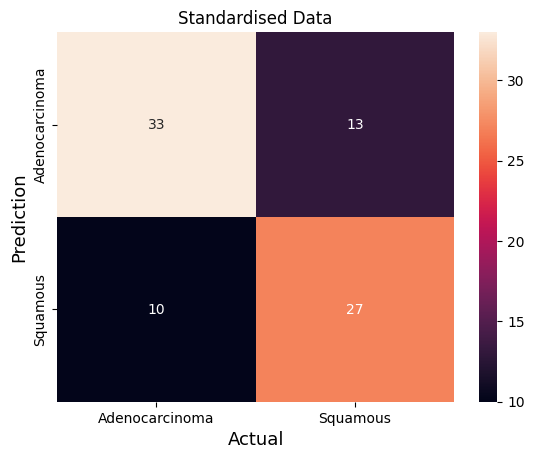

In [ ]:
dat_lr=confusion_matrix(y_pred_dc,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

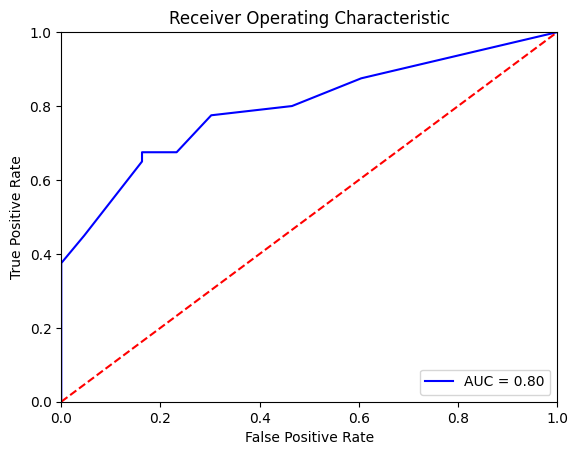

In [ ]:
probs = model_dc.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Random Forest Classifier**

In [ ]:
def objective(trial):

  temp_acc = []

  max_depth = trial.suggest_int("max_depth", 1, 10)

  min_samples_split = trial.suggest_int("min_samples_split",2,50)

  min_samples_leaf = trial.suggest_int("min_samples_leaf",1,50)

  max_leaf_nodes = trial.suggest_int("max_leaf_nodes",5,100)

  n_estimators = trial.suggest_int("n_estimators",10,100)

  #K-fold stratified Split
  for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    y_train_temp = y_train[train_index]
    x_train_temp = x_train[train_index]

    y_val_temp = y_train[test_index]
    x_val_temp = x_train[test_index]

    model = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_leaf_nodes = max_leaf_nodes,n_estimators=n_estimators,random_state=42)

    #Training the Model
    model.fit(x_train_temp,y_train_temp.ravel())

    y_pred = model.predict(x_val_temp)

    v0 = metrics.accuracy_score(y_val_temp, y_pred)

    temp_acc.append(v0)

  return np.array(temp_acc).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)


[I 2023-09-12 11:30:23,892] A new study created in memory with name: no-name-7679b4c1-dabd-4835-8a8d-98d48c8dd8c9
[I 2023-09-12 11:30:25,190] Trial 0 finished with value: 0.7801619433198381 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_leaf_nodes': 69, 'n_estimators': 77}. Best is trial 0 with value: 0.7801619433198381.
[I 2023-09-12 11:30:25,484] Trial 1 finished with value: 0.7696356275303644 and parameters: {'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 35, 'max_leaf_nodes': 89, 'n_estimators': 19}. Best is trial 0 with value: 0.7801619433198381.
[I 2023-09-12 11:30:26,242] Trial 2 finished with value: 0.7696356275303644 and parameters: {'max_depth': 9, 'min_samples_split': 32, 'min_samples_leaf': 11, 'max_leaf_nodes': 85, 'n_estimators': 38}. Best is trial 0 with value: 0.7801619433198381.
[I 2023-09-12 11:30:27,490] Trial 3 finished with value: 0.7855600539811067 and parameters: {'max_depth': 7, 'min_samples_split': 23, 'min_sam

{'max_depth': 4, 'min_samples_split': 25, 'min_samples_leaf': 8, 'max_leaf_nodes': 14, 'n_estimators': 52}


In [ ]:
temp_dict = study.best_params

In [ ]:
max_depth = temp_dict["max_depth"]

min_samples_split = temp_dict["min_samples_split"]

min_samples_leaf = temp_dict["min_samples_leaf"]

max_leaf_nodes = temp_dict["max_leaf_nodes"]

n_estimators = temp_dict["n_estimators"]

In [ ]:
model_rfc = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_leaf_nodes = max_leaf_nodes,n_estimators=n_estimators,random_state=42).fit(x_train,y_train)
y_pred_rfc=model_rfc.predict(x_test)


print("Training Accuracy is:-",model_rfc.score(x_train,y_train))
print("Classification Accuracy is:-",model_rfc.score(x_test,y_test))

Training Accuracy is:- 0.8167539267015707
Classification Accuracy is:- 0.7710843373493976


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.79      0.77      0.78        43
      Squamous       0.76      0.78      0.77        40

      accuracy                           0.77        83
     macro avg       0.77      0.77      0.77        83
  weighted avg       0.77      0.77      0.77        83



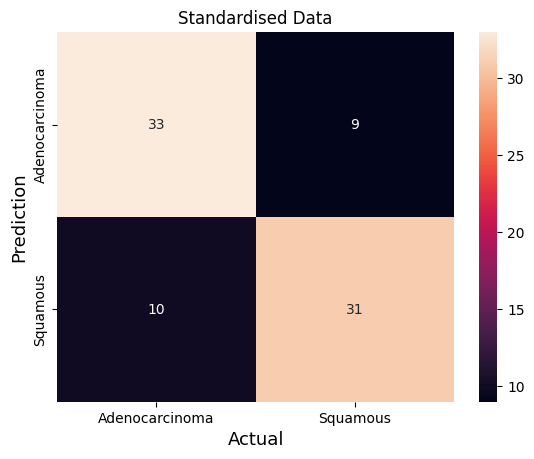

In [ ]:
dat_lr=confusion_matrix(y_pred_rfc,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

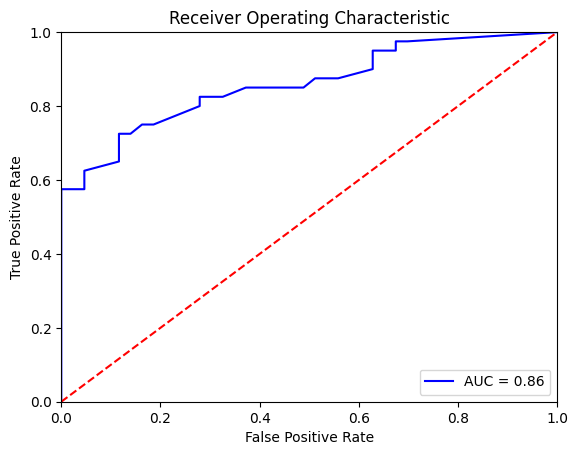

In [ ]:
probs = model_rfc.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**XGBoost Classifier**

In [ ]:
def objective(trial):

  temp_acc = []

  max_depth = trial.suggest_int("max_depth", 1, 10)

  #K-fold stratified Split
  for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    y_train_temp = y_train[train_index]
    x_train_temp = x_train[train_index]

    y_val_temp = y_train[test_index]
    x_val_temp = x_train[test_index]

    model = XGBClassifier(max_depth=max_depth,random_state=42)

    #Training the Model
    model.fit(x_train_temp,y_train_temp.ravel())

    y_pred = model.predict(x_val_temp)

    v0 = metrics.accuracy_score(y_val_temp, y_pred)
    temp_acc.append(v0)

  return np.array(temp_acc).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_params)


[I 2023-09-12 11:31:26,898] A new study created in memory with name: no-name-4aa4dbfa-5d0e-4d88-98fe-888c7a9f2aff
[I 2023-09-12 11:31:27,093] Trial 0 finished with value: 0.727800269905533 and parameters: {'max_depth': 10}. Best is trial 0 with value: 0.727800269905533.
[I 2023-09-12 11:31:27,253] Trial 1 finished with value: 0.727800269905533 and parameters: {'max_depth': 6}. Best is trial 0 with value: 0.727800269905533.
[I 2023-09-12 11:31:27,417] Trial 2 finished with value: 0.7329284750337381 and parameters: {'max_depth': 4}. Best is trial 2 with value: 0.7329284750337381.
[I 2023-09-12 11:31:27,567] Trial 3 finished with value: 0.727800269905533 and parameters: {'max_depth': 7}. Best is trial 2 with value: 0.7329284750337381.
[I 2023-09-12 11:31:27,726] Trial 4 finished with value: 0.727800269905533 and parameters: {'max_depth': 10}. Best is trial 2 with value: 0.7329284750337381.
[I 2023-09-12 11:31:28,005] Trial 5 finished with value: 0.727800269905533 and parameters: {'max_dep

{'max_depth': 1}


In [ ]:
temp_dict = study.best_params

In [ ]:
max_depth = temp_dict["max_depth"]

In [ ]:
model_xgb = XGBClassifier(max_depth=max_depth,random_state=42).fit(x_train,y_train)
y_pred_xgb=model_xgb.predict(x_test)

print("Training Accuracy is:-",model_xgb.score(x_train,y_train))
print("Classification Accuracy is:-",model_xgb.score(x_test,y_test))

Training Accuracy is:- 0.8167539267015707
Classification Accuracy is:- 0.7710843373493976


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.79      0.77      0.78        43
      Squamous       0.76      0.78      0.77        40

      accuracy                           0.77        83
     macro avg       0.77      0.77      0.77        83
  weighted avg       0.77      0.77      0.77        83



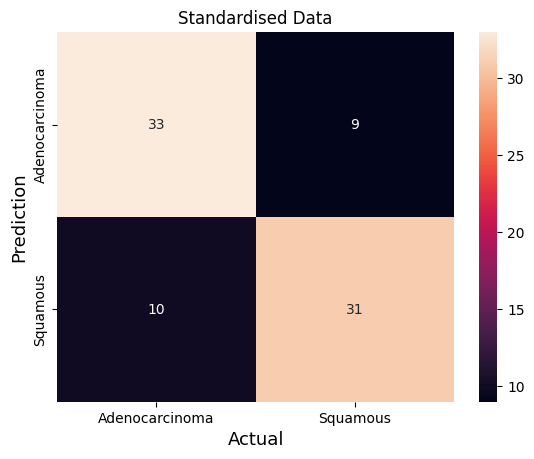

In [ ]:
dat_lr=confusion_matrix(y_pred_xgb,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

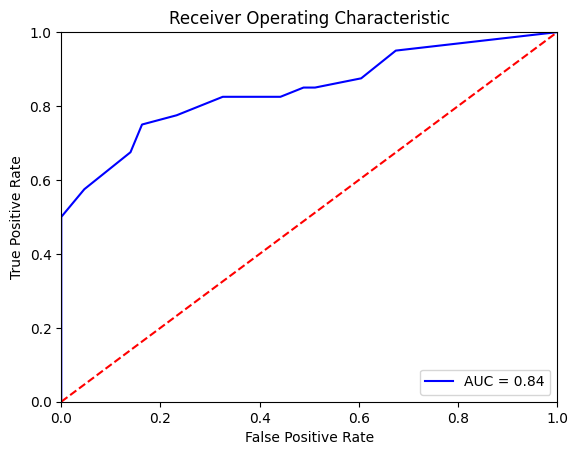

In [ ]:
probs = model_xgb.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Gaussian Process Classifier**

In [ ]:
lbound = 1e-5
rbound = 1e5

n_restarts = 50

n_features = len(x_train[0])

# kernel=C(1.0, (lbound,rbound)) * RBF(n_features*[n_features], (lbound,rbound))  + WhiteKernel()

model_gpc = GaussianProcessClassifier().fit(x_train,y_train)
y_pred_gpc=model_gpc.predict(x_test)

print("Classification Accuracy is:-",model_gpc.score(x_test,y_test))

Classification Accuracy is:- 0.7710843373493976


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_gpc, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.75      0.84      0.79        43
      Squamous       0.80      0.70      0.75        40

      accuracy                           0.77        83
     macro avg       0.78      0.77      0.77        83
  weighted avg       0.77      0.77      0.77        83



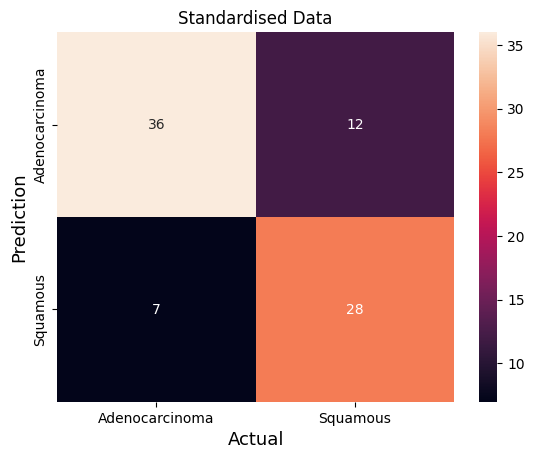

In [ ]:
dat_lr=confusion_matrix(y_pred_gpc,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

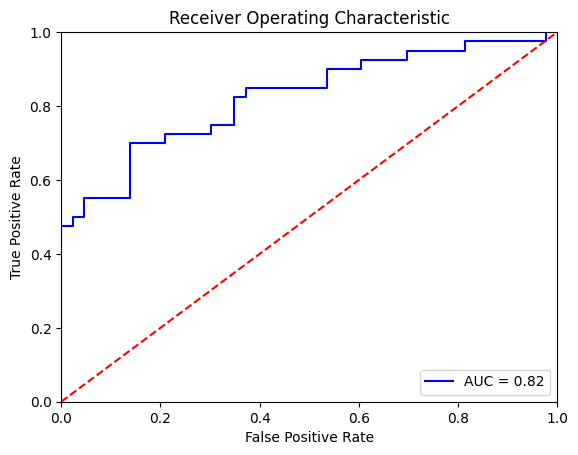

In [ ]:
probs = model_gpc.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**KNN Classifier**

In [ ]:
def objective(trial):

  temp_acc = []

  n_neighbors = trial.suggest_int("n_neighbors", 1, 10)
  weights = trial.suggest_categorical("weights",["uniform", "distance"])
  p = trial.suggest_int("p", 1, 5)

  #K-fold stratified Split
  for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    y_train_temp = y_train[train_index]
    x_train_temp = x_train[train_index]

    y_val_temp = y_train[test_index]
    x_val_temp = x_train[test_index]

    model = KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights,p=p)

    #Training the Model
    model.fit(x_train_temp,y_train_temp.ravel())

    y_pred = model.predict(x_val_temp)

    v0 = metrics.accuracy_score(y_val_temp, y_pred)

    if (len(temp_data_np)==0):
      v0 = 0

    temp_acc.append(v0)

  return np.array(temp_acc).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print(study.best_params)


[I 2023-09-12 11:32:02,342] A new study created in memory with name: no-name-8f7915d2-368b-4226-b55c-b76a3743bfc7
[I 2023-09-12 11:32:02,378] Trial 0 finished with value: 0.7801619433198381 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'p': 4}. Best is trial 0 with value: 0.7801619433198381.
[I 2023-09-12 11:32:02,410] Trial 1 finished with value: 0.73306342780027 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.7801619433198381.
[I 2023-09-12 11:32:02,426] Trial 2 finished with value: 0.7225371120107962 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7801619433198381.
[I 2023-09-12 11:32:02,455] Trial 3 finished with value: 0.7852901484480432 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'p': 3}. Best is trial 3 with value: 0.7852901484480432.
[I 2023-09-12 11:32:02,473] Trial 4 finished with value: 0.7434547908232119 and parameters: {'n_neighbors': 9, 'weights': 'dist

{'n_neighbors': 5, 'weights': 'uniform', 'p': 5}


In [ ]:
temp_dict = study.best_params

In [ ]:
n_neighbors = temp_dict["n_neighbors"]
weights = temp_dict["weights"]
p = temp_dict["p"]

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights,p=p).fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

print("Classification Accuracy is:-",model_knn.score(x_test,y_test))

Classification Accuracy is:- 0.8072289156626506


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.80      0.84      0.82        43
      Squamous       0.82      0.78      0.79        40

      accuracy                           0.81        83
     macro avg       0.81      0.81      0.81        83
  weighted avg       0.81      0.81      0.81        83



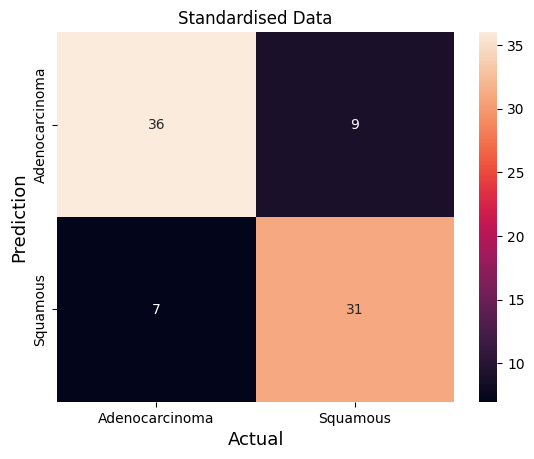

In [ ]:
dat_lr=confusion_matrix(y_pred_knn,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

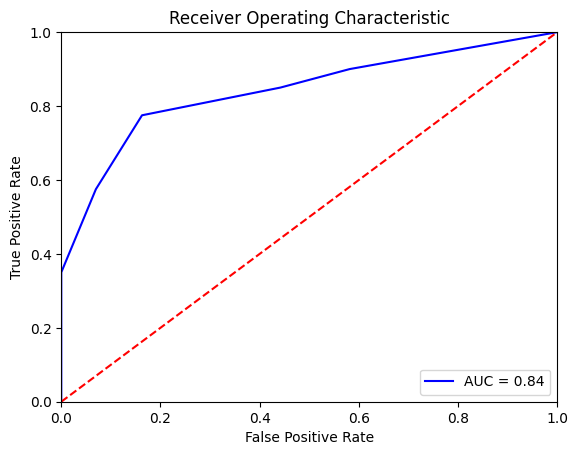

In [ ]:
probs = model_knn.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**LDA Classifier**

In [ ]:
model_lda =LinearDiscriminantAnalysis().fit(x_train,y_train)
y_pred_lda=model_lda.predict(x_test)

print("Classification Accuracy is:-",model_lda.score(x_test,y_test))

Classification Accuracy is:- 0.7349397590361446


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_lda, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.74      0.74      0.74        43
      Squamous       0.72      0.72      0.73        40

      accuracy                           0.73        83
     macro avg       0.73      0.73      0.73        83
  weighted avg       0.73      0.73      0.73        83



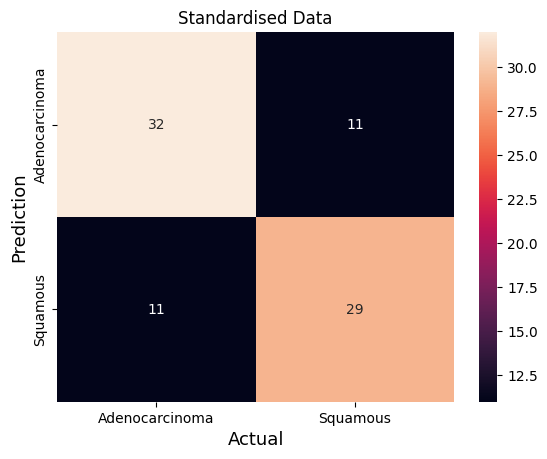

In [ ]:
dat_lr=confusion_matrix(y_pred_lda,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

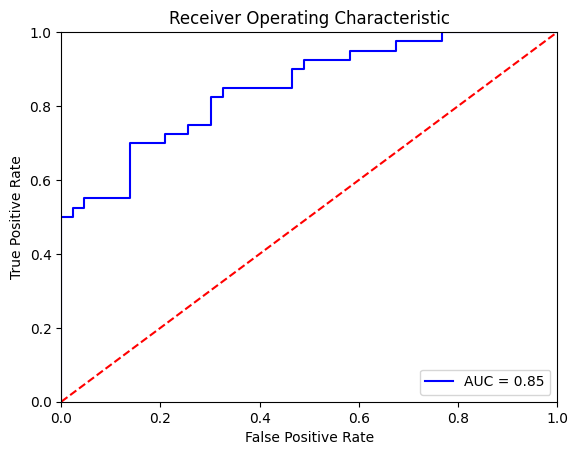

In [ ]:
probs = model_lda.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Support Vector Classifier**

In [ ]:
def objective(trial):

  temp_acc = []

  C = trial.suggest_float("C", 0, 1)

  kernel = trial.suggest_categorical("kernel",["linear", "poly", "rbf", "sigmoid"])

  #K-fold stratified Split
  for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    y_train_temp = y_train[train_index]
    x_train_temp = x_train[train_index]

    y_val_temp = y_train[test_index]
    x_val_temp = x_train[test_index]

    model = SVC(probability=True, C=C, kernel=kernel,random_state = 42)

    #Training the Model
    model.fit(x_train_temp,y_train_temp.ravel())

    y_pred = model.predict(x_val_temp)

    v0 = metrics.accuracy_score(y_val_temp, y_pred)

    if (len(temp_data_np)==0):
      v0 = 0

    temp_acc.append(v0)

  return np.array(temp_acc).mean()


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print(study.best_params)


[I 2023-09-12 11:32:14,740] A new study created in memory with name: no-name-b647eca7-799f-44d2-8ceb-04826d6f48eb
[I 2023-09-12 11:32:14,795] Trial 0 finished with value: 0.7592442645074224 and parameters: {'C': 0.8089699157583797, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7592442645074224.
[I 2023-09-12 11:32:14,856] Trial 1 finished with value: 0.7697705802968962 and parameters: {'C': 0.15310204186410659, 'kernel': 'sigmoid'}. Best is trial 1 with value: 0.7697705802968962.
[I 2023-09-12 11:32:14,896] Trial 2 finished with value: 0.7226720647773279 and parameters: {'C': 0.6509069581101764, 'kernel': 'poly'}. Best is trial 1 with value: 0.7697705802968962.
[I 2023-09-12 11:32:14,955] Trial 3 finished with value: 0.7539811066126856 and parameters: {'C': 0.11414639122019243, 'kernel': 'rbf'}. Best is trial 1 with value: 0.7697705802968962.
[I 2023-09-12 11:32:15,022] Trial 4 finished with value: 0.7696356275303644 and parameters: {'C': 0.28250308510756295, 'kernel': 'rbf'}. Best i

{'C': 0.0741318438246399, 'kernel': 'linear'}


In [ ]:
temp_dict = study.best_params

In [ ]:
C = temp_dict["C"]

kernel = temp_dict["kernel"]

In [ ]:
model_svc = SVC(probability=True, C=C, kernel=kernel,random_state = 42).fit(x_train,y_train)
y_pred_svc=model_svc.predict(x_test)

print("Classification Accuracy is:-",model_svc.score(x_test,y_test))

Classification Accuracy is:- 0.7710843373493976


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_svc, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.75      0.84      0.79        43
      Squamous       0.80      0.70      0.75        40

      accuracy                           0.77        83
     macro avg       0.78      0.77      0.77        83
  weighted avg       0.77      0.77      0.77        83



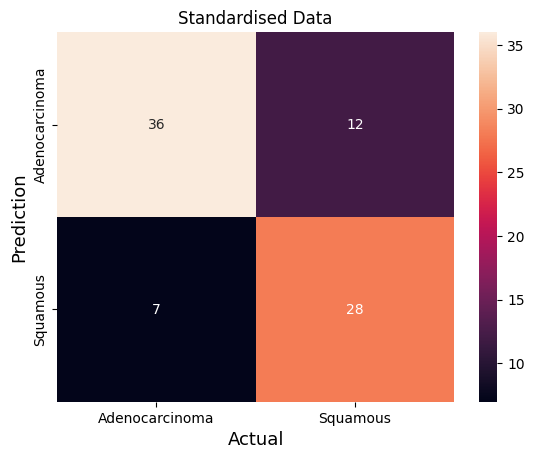

In [ ]:
dat_lr=confusion_matrix(y_pred_svc,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

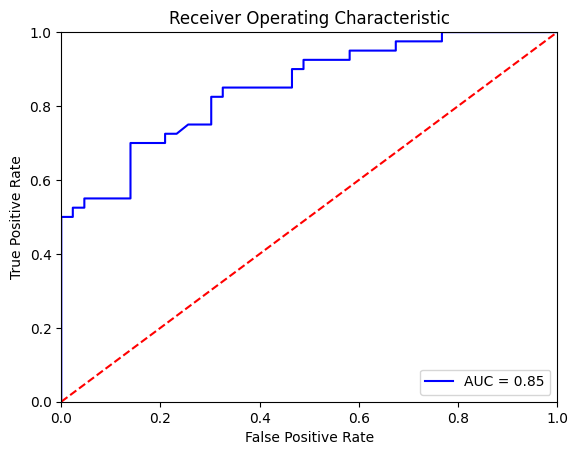

In [ ]:
probs = model_svc.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Sk-learn Neural Network Optimisation**

In [ ]:
def objective(trial):

  temp_acc = []

  n_layers = trial.suggest_int("n_layers", 1, 5)

  layers = []

  for i in range(n_layers):
    hidden_neuron = trial.suggest_int("Num Hidden_"+str(i), 1, 500)
    layers.append(hidden_neuron)

  #L2 Regularisation term
  alpha = trial.suggest_float("alpha",1e-5,1e-2)

  learning_rate = trial.suggest_categorical("learning_rate",["constant", "invscaling", "adaptive"])

  learning_rate_init = trial.suggest_float("learning_rate_init",1e-5,1e-1)

  max_iter = trial.suggest_int("max_iter", 50, 2000)

  tol = trial.suggest_float("tol",1e-5,1e-3)

  #K-fold stratified Split
  for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
    y_train_temp = y_train[train_index]
    x_train_temp = x_train[train_index]

    #Data for C-means
    x_train_data_temp = x_train_temp[:,0:len(x_train_temp[0])-4]
    x_train_meta_temp = x_train_temp[:,len(x_train_temp[0])-4:]

    y_val_temp = y_train[test_index]
    x_val_temp = x_train[test_index]


    model = MLPClassifier(hidden_layer_sizes=layers , alpha = alpha, learning_rate= learning_rate, learning_rate_init= learning_rate_init, max_iter= max_iter,tol=tol,early_stopping=True,validation_fraction=0.3 ,random_state=42)

    #Training the Model

    model.fit(x_train_temp,y_train_temp.ravel())

    y_pred = model.predict(x_val_temp)

    v0 = metrics.accuracy_score(y_val_temp, y_pred)

    if (len(temp_data_np)==0):
      v0 = 0

    temp_acc.append(v0)

  return np.array(temp_acc).mean()




study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

print(study.best_params)


[I 2023-09-12 11:32:27,496] A new study created in memory with name: no-name-773294f2-26c4-43cf-80e7-7355967b93fc
[I 2023-09-12 11:32:28,009] Trial 0 finished with value: 0.7435897435897436 and parameters: {'n_layers': 3, 'Num Hidden_0': 139, 'Num Hidden_1': 8, 'Num Hidden_2': 410, 'alpha': 0.0057682538819372065, 'learning_rate': 'adaptive', 'learning_rate_init': 0.000896615520799646, 'max_iter': 1787, 'tol': 6.496793184756594e-05}. Best is trial 0 with value: 0.7435897435897436.
[I 2023-09-12 11:32:29,748] Trial 1 finished with value: 0.7696356275303644 and parameters: {'n_layers': 5, 'Num Hidden_0': 290, 'Num Hidden_1': 338, 'Num Hidden_2': 233, 'Num Hidden_3': 85, 'Num Hidden_4': 177, 'alpha': 0.00654669084198375, 'learning_rate': 'adaptive', 'learning_rate_init': 0.034722078803137754, 'max_iter': 1278, 'tol': 0.00042665682433764955}. Best is trial 1 with value: 0.7696356275303644.
[I 2023-09-12 11:32:31,216] Trial 2 finished with value: 0.7120107962213226 and parameters: {'n_layers

{'n_layers': 2, 'Num Hidden_0': 67, 'Num Hidden_1': 221, 'alpha': 0.008464906710732734, 'learning_rate': 'constant', 'learning_rate_init': 0.05613490897786912, 'max_iter': 2000, 'tol': 0.00046010937163844007}


In [ ]:
temp_dict = study.best_params

In [ ]:
n_layers = temp_dict["n_layers"]

layers = []

for i in range(n_layers):
  hidden_neuron = temp_dict["Num Hidden_"+str(i)]
  layers.append(hidden_neuron)


#L2 Regularisation term
alpha = temp_dict["alpha"]

learning_rate = temp_dict["learning_rate"]

learning_rate_init = temp_dict["learning_rate_init"]

max_iter = temp_dict["max_iter"]

tol = temp_dict["tol"]

model_nn = MLPClassifier(hidden_layer_sizes=layers , alpha = alpha, learning_rate= learning_rate, learning_rate_init= learning_rate_init, max_iter= max_iter,tol=tol,early_stopping=True,validation_fraction=0.3 ,random_state=42)



#Training the Model
model_nn.fit(x_train,y_train.ravel())


MLPClassifier(alpha=0.008464906710732734, early_stopping=True,
              hidden_layer_sizes=[67, 221],
              learning_rate_init=0.05613490897786912, max_iter=2000,
              random_state=42, tol=0.00046010937163844007,
              validation_fraction=0.3)

In [ ]:
y_pred_nn=model_nn.predict(x_test)

print("Accuracy on the training data is:-",model_nn.score(x_train,y_train))
print("Classification Accuracy is:-",model_nn.score(x_test,y_test))

Accuracy on the training data is:- 0.7696335078534031
Classification Accuracy is:- 0.7228915662650602


In [ ]:
target_names = ['Adenocarcinoma','Squamous']
print(classification_report(y_test, y_pred_nn, target_names=target_names))

                precision    recall  f1-score   support

Adenocarcinoma       0.75      0.70      0.72        43
      Squamous       0.70      0.75      0.72        40

      accuracy                           0.72        83
     macro avg       0.72      0.72      0.72        83
  weighted avg       0.72      0.72      0.72        83



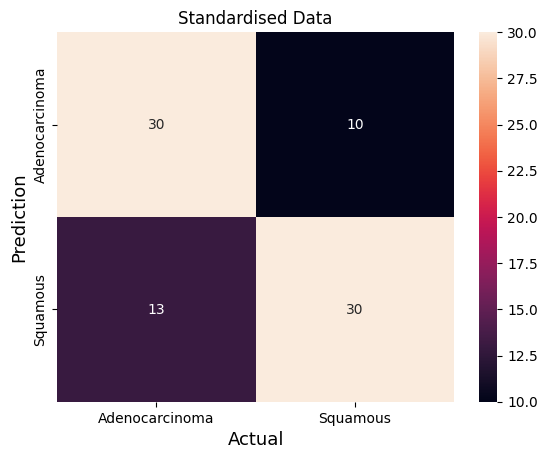

In [ ]:
dat_lr=confusion_matrix(y_pred_nn,y_test)
sns.heatmap(dat_lr,annot=True,xticklabels=['Adenocarcinoma','Squamous'],
            yticklabels=['Adenocarcinoma','Squamous'])
plt.title("Standardised Data")
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.show()

In [ ]:
for i in range(len(y_pred_nn)):
  if (y_pred_nn[i]==0 and y_pred_nn[i]!=y_test[i]):
    print(sample_id_test[i])

SRR3991455
SRR3991474
SRR3991473
SRR3991551
SRR3991346
SRR3991612
SRR3991419
SRR3991438
SRR3991426
SRR3991349


In [ ]:
for i in range(len(y_pred_nn)):
  if (y_pred_nn[i]==1 and y_pred_nn[i]!=y_test[i]):
    print(sample_id_test[i])

SRR3991598
SRR3991560
SRR3991405
SRR3991559
SRR3991523
SRR3991541
SRR3991353
SRR3991548
SRR3991394
SRR3991505
SRR3991499
SRR3991348
SRR3991421


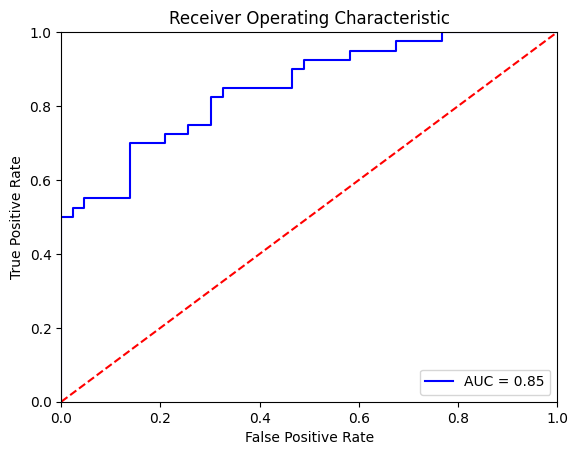

In [ ]:
probs = model_nn.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()